## Final Project Submission

Please fill out: 
* Student name: Farnaz Golnam
* Student pace: full time
* Scheduled project review date/time: April 2nd, 7:30 am(PSD)
* Instructor name: Rafael Carrasco
* Blog post URL: https://datasciencefordesigners.wordpress.com


# Project Title: Costumer Churn Data

Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. Note that this is a binary classification problem.

### Outline:

1. Data cleaning and preprocessing

2. Modeling

3. Model evaluating

5. choosing final model 

# Importing Libraries

In [118]:
#Datarames and Computation
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

#SCIKIT LEARN
#Scikit-learn is a machine learning toolkit that provides various tools to cater to different aspects of machine
#learning e.g. Classification, Regression, Clustering, Dimensionality reduction, Model selection, Preprocessing.
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

#train test split
from sklearn.model_selection import train_test_split

#k-fold cross validation
from sklearn.model_selection import cross_val_score

#PICKLE for saving objects
import pickle

In [119]:
#smote for balancing data
#!pip install imblearn
#import imblearn
#from imblearn.over_sampling import SMOTE
# Install a pip package in the current Jupyter kernel

import sys
!{sys.executable} -m pip install imblearn

from imblearn.over_sampling import SMOTE

# Importing Data 

In [120]:
#import Data
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Changin column names to a python format

In [121]:
# First thing is to change the column names in order to remove " " between parts
data.columns = data.columns.str.strip().str.replace(' ', '_')
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [122]:
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Cleaning and preprocessing Checklist for machine learning:
Pre-processing refers to the transformations applied to our data before feeding it to the algorithm:

1.check for data type : Numeric(int/float), Str, bool and also we check for date/time data as well.

2.check for Missing data and placeholders (also check for duplicates and outliers).

3.check for categorical data and dummy variables.

4.Check for collinearity.

5.Scalling (also check for data distribution).

6.check for class imbalancement.

7.spliting data to train/test

### 1.Check for data types

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account_length            3333 non-null int64
area_code                 3333 non-null int64
phone_number              3333 non-null object
international_plan        3333 non-null object
voice_mail_plan           3333 non-null object
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64

 ### 1a) changing data types
 
 1. We have "Voice_mail_plan" and "International_Plan" that are objects but their data are yes/no, so we can replace them with 0/1 by converting them to int type.
 
 2. "Churn" column is also boolean and can be replaced with 0/1.

In [124]:
data["international_plan"]=data.international_plan.replace("yes","1").replace("no","0").astype(int)

data["voice_mail_plan"]=data.voice_mail_plan.replace("yes","1").replace("no","0").astype(int)

data["churn"]=data.churn.replace("True","1").replace("False","0")
data["churn"]=data.churn.astype(int)

#data.international_plan.head() 
#data.voice_mail_plan.head()
#data.churn.head()

### 1b)changing the phone-numbers format to unique numbers 
we decide to drop phone_numbers from the columns to prevent unnecessary complexity

In [125]:
data.phone_number.unique()

array(['382-4657', '371-7191', '358-1921', ..., '328-8230', '364-6381',
       '400-4344'], dtype=object)

In [126]:
data=data.drop(['phone_number'], axis=1)
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 1c) changing state format from text to numbers

In [127]:
data.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

#### To change the name of states to numbers we treat them as categorical data, we can use any of these 3 options to deal with categorical data: 
```
pd.get_dummies(data, columns=['state'], drop_first=True)
```
 
it gves us a dataframe with 71 coulumns due to adding 50 dummy variable columns

In [128]:
data_dummies=pd.get_dummies(data, columns=['state'], drop_first=True)
data_dummies.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


### 2. Check for missing data and placeholders

In [129]:
print(data.shape)
data.isna().sum()

(3333, 20)


state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

### as we can see we dont have any missing data but it cant guaranree that there is no placeholder as well, so we quickly check all values of columns for placeholders

In [130]:
#check for place holders

for column in data:
    #Select column contents by column name using [] operator
    columnSeriesdf = data[column]
    print('Colunm Name : ', column)
    print('Column Contents : ', columnSeriesdf.unique())

Colunm Name :  state
Column Contents :  ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Colunm Name :  account_length
Column Contents :  [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 19

#### we found nothing strange, so we have a dataset with no missing data and no place holders, FANTASTIC!

### 3. Initial check for collinearity

we can drop the first round of unnecessary columns through checking the multicollenearity of variables

In [131]:
# with considering state column
# data.corr()['churn'].sort_values(ascending=False)

# without considering state , phone_number 
data.drop(['state'],axis=1).corr()['churn'].sort_values(ascending=False)

churn                     1.000000
international_plan        0.259852
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
voice_mail_plan          -0.102148
Name: churn, dtype: float64

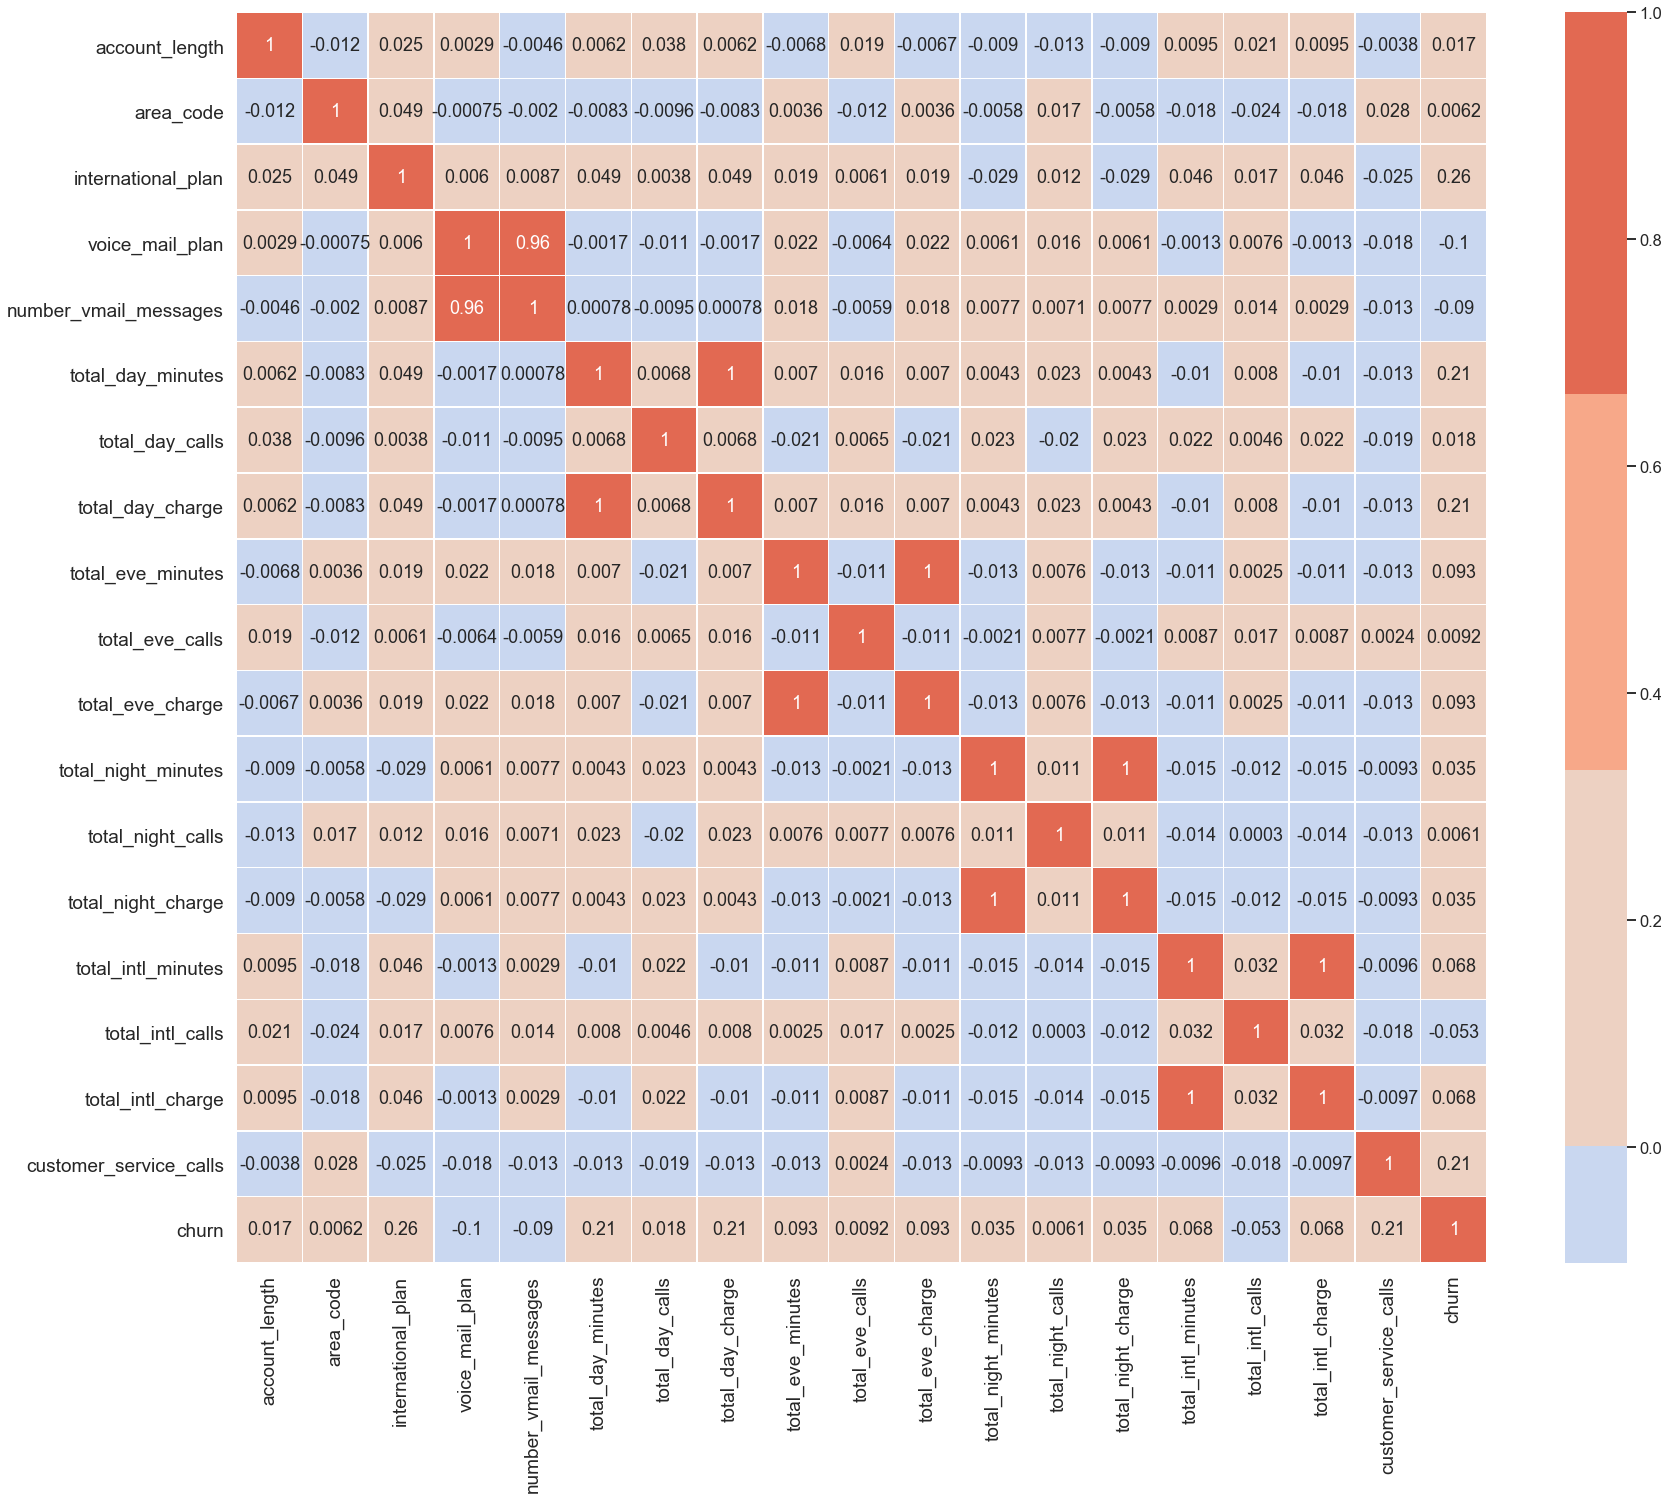

In [132]:
#Heatmap of all correlation coefficients
plt.figure(figsize=(28,23))
ax= sns.heatmap(data.corr(), annot=True, cmap=sns.color_palette('coolwarm'), center=0, linewidths=.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(size = 19)
plt.yticks(size = 19)
plt.show()

So according to the heat map and for the very first round of data inspection we can delete 'voice_mail_plan' , 'total_day_minutes', 'total_eve_minutes' , 'total_night_minutes' , 'total_intl_minutes' , because the 'charge' and 'number_vmail_messages' columns will do the same for the dataset.

In [133]:
# data=data after dropping 'phone_numbers','voice_mail_plan','total_day_minutes',
#'total_eve_minutes','total_night_minutes','total_intl_minutes' and changing "state" to numbers.

data=data.drop(['voice_mail_plan','total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)
print(data.shape)
data.head()

(3333, 15)


,state,account_length,area_code,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,0,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


### 4. Check for distributions, outliers and categorical data
outliers are not so important for machine learning algorithm, because of splitting data.
we can check the accuracy of the models with or withouth droppng outliers.

**Note**: to plot histograms all the required features should be numeric and integers, otherwise it cant be shown.

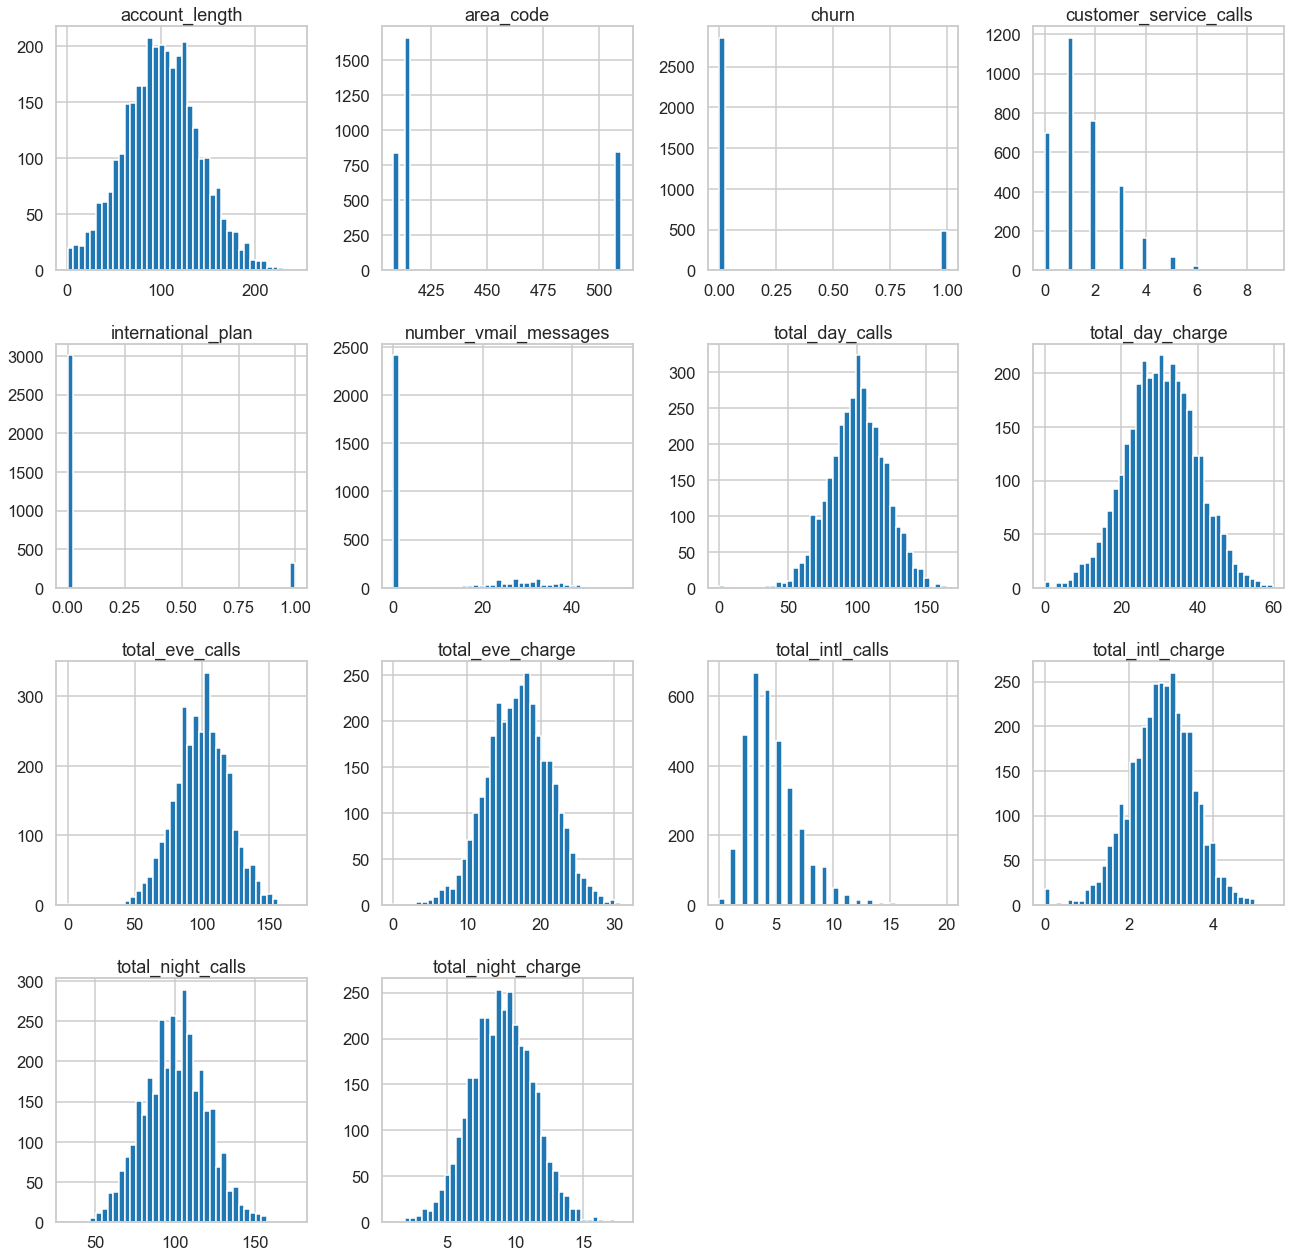

In [134]:
# fig,axes = plt.subplots(nrows=5,ncols=4)
# data.plot(subplots=True, ax=axes)

data.hist(bins= 40, figsize  = [22, 22])
plt.show()

### 4a) categorical data

#### All machine learning models are some kind of mathematical model that need numbers to work with. This is one of the primary reasons we need to pre-process the categorical data before we can feed it to machine learning models.

#### based on the histograms, we have 3 categorical features:
1. area_code with 3 categories 408, 415 and 510

In [135]:
data.area_code.value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

2. international_plan with 1 or 0 which means yes or no
3. state with 51 numbers for each state
4. our target data is also binary, churn 1 or 0 which means yes or no

### for area_code and state columns:
we need to apply pandas get dummies or sklearn One-Hot-Encoding or column_transformer to create dummy columns and equalize the relationship between their numbers so they can be treated equally by the model to predict accurate results. 

As we discussed before, we are going to use pandas get dummies to convert categorical data to 0/1 numbers.

In [136]:
# to create dummy variables:
# data=data after dropping 'phone_numbers','voice_mail_plan','total_day_minutes','total_eve_minutes','total_night_minutes',
#'total_intl_minutes' and binarizing "state" and "area_code" to 0/1 categories.
data =pd.get_dummies(data, columns=['state', 'area_code'], drop_first=True)
data.head()

,account_length,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510
0,128,0,25,110,45.07,99,16.78,91,11.01,3,...,0,0,0,0,0,0,0,0,1,0
1,107,0,26,123,27.47,103,16.62,103,11.45,3,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,114,41.38,110,10.30,104,7.32,5,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,71,50.90,88,5.26,89,8.86,7,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,113,28.34,122,12.61,121,8.41,3,...,0,0,0,0,0,0,0,0,1,0


### 4b) checking for outliers 

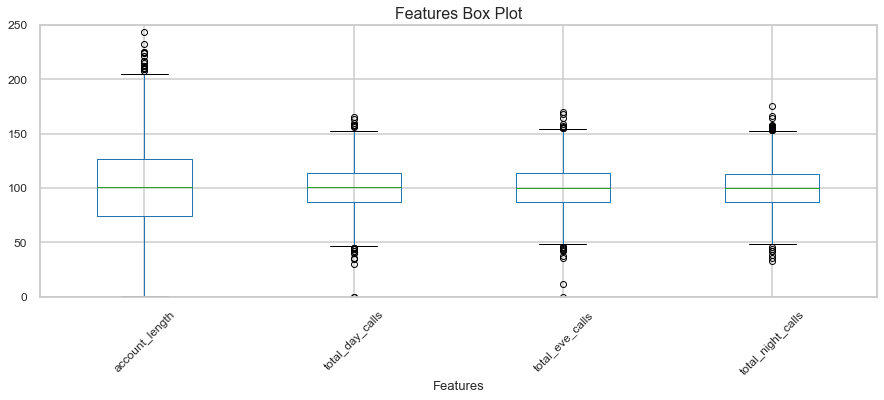

In [137]:
# creating box plots for featurs with similar distribution range:

columns=['account_length','total_day_calls','total_eve_calls','total_night_calls']

data[columns].boxplot(figsize=(15,5), rot = 45)
plt.xlabel('Features', size = 13)
plt.title('Features Box Plot', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylim(0,250);

In [138]:
# dropping outliers from the features:
data = data.loc[data['account_length']<=200] 
data = data[(data['total_day_calls'] >= 50) & (data['total_day_calls'] <= 150)]
data = data[(data['total_eve_calls'] >= 50) & (data['total_eve_calls'] <= 150)]
data = data[(data['total_night_calls'] >=50) & (data['total_night_calls'] <= 150)]


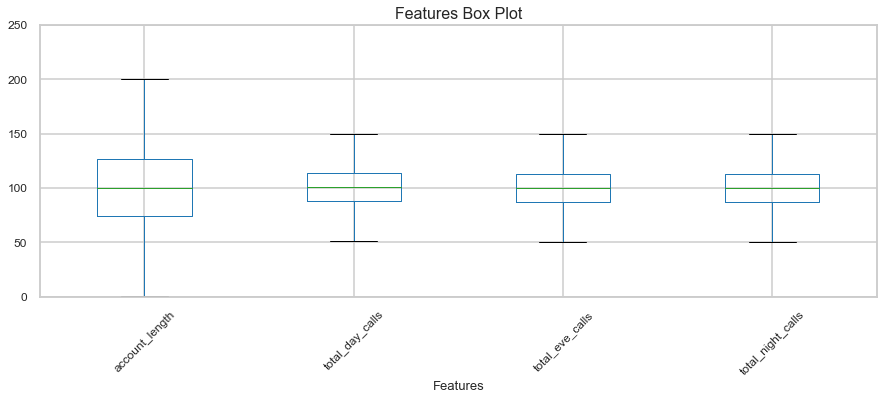

In [139]:
# checking the new set of box plots after dropping outliers
data[columns].boxplot(figsize=(15,5), rot = 45)
plt.xlabel('Features', size = 13)
plt.title('Features Box Plot', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylim(0,250);

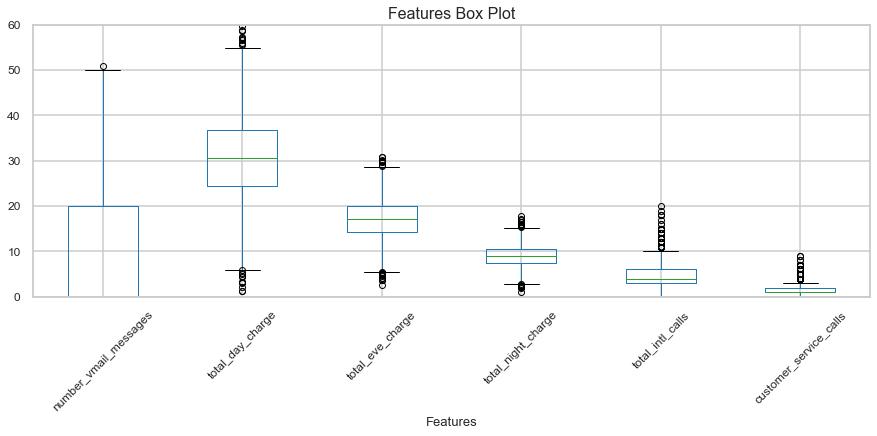

In [140]:
# creating another box plots for the rest of featurs with similar distribution range:
columns1=['number_vmail_messages','total_day_charge','total_eve_charge',
          'total_night_charge','total_intl_calls','customer_service_calls']

data[columns1].boxplot(figsize=(15,5), rot = 45)
plt.xlabel('Features', size = 13)
plt.title('Features Box Plot', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylim(0,60);

In [141]:
# dropping outliers from the features:
data = data.loc[data['number_vmail_messages']<=50]
data = data[(data['total_day_charge'] >= 6) & (data['total_day_charge'] <= 55)]
data = data[(data['total_eve_charge'] >=7) & (data['total_eve_charge'] <= 27)]
data = data[(data['total_night_charge'] >=3) & (data['total_night_charge'] <= 15)]
data = data[(data['total_intl_calls'] <=10)]
data = data[(data['total_intl_charge'] >=1) & (data['total_intl_charge'] <= 4.5)]
data = data[(data['customer_service_calls'] <=4)]

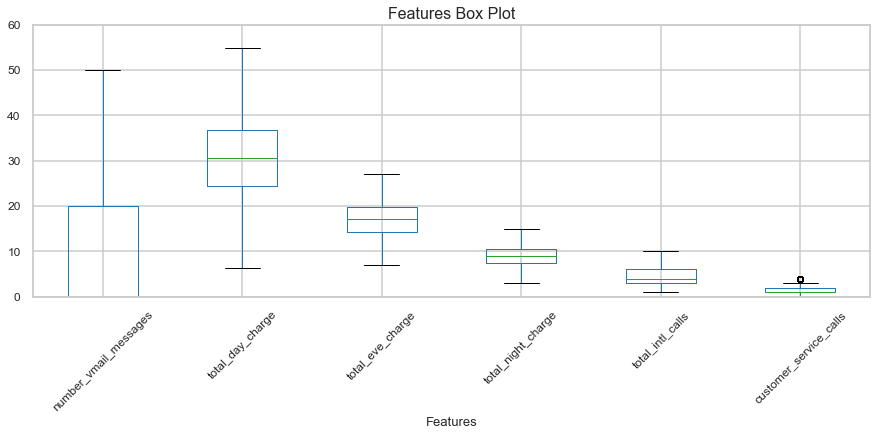

In [142]:
# checking the new set of box plots after dropping outliers
data[columns1].boxplot(figsize=(15,5), rot = 45)
plt.xlabel('Features', size = 13)
plt.title('Features Box Plot', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylim(0,60);

### data, is the dataset after dropping:
'phone_numbers','voice_mail_plan','total_day_minutes','total_eve_minutes','total_night_minutes',
'total_intl_minutes' and binarizing "state" and "area_code" to 0/1 categories, and removing outliers.

### 4c) checking for data distributions
Besides 'number_vmail_messages' most other features are normally distributed.

we can do either of these options:

drop all the non-zero data.
use a log(x+1) to have a smoother distribution on this feature.

In [143]:
data.number_vmail_messages.value_counts().sort_index()

0     2055
4        1
8        1
9        1
10       1
11       2
12       6
13       4
14       5
15       8
16      12
17      12
18       7
19      17
20      16
21      21
22      22
23      32
24      34
25      32
26      38
27      38
28      44
29      46
30      41
31      52
32      36
33      38
34      24
35      27
36      28
37      27
38      23
39      27
40      13
41      10
42      11
43       8
44       7
45       6
46       4
47       2
48       2
49       1
50       2
Name: number_vmail_messages, dtype: int64

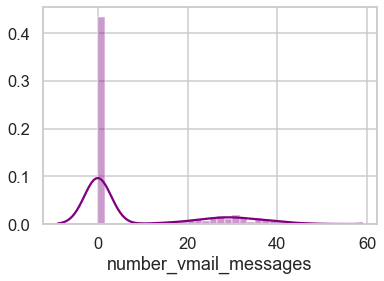

In [144]:
#create a copy of feature in original data frame to play with:
data1 = data.copy(deep=True)
data1['number_vmail_messages'] = data['number_vmail_messages'].apply(lambda x: np.log(x+1))
sns.distplot(data['number_vmail_messages'], bins=30, kde=True, rug=False, color="purple")

In [145]:
data1.head()

,account_length,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510
0,128,0,3.258097,110,45.07,99,16.78,91,11.01,3,...,0,0,0,0,0,0,0,0,1,0
1,107,0,3.295837,123,27.47,103,16.62,103,11.45,3,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0.000000,114,41.38,110,10.30,104,7.32,5,...,0,0,0,0,0,0,0,0,1,0
4,75,1,0.000000,113,28.34,122,12.61,121,8.41,3,...,0,0,0,0,0,0,0,0,1,0
5,118,1,0.000000,98,37.98,101,18.75,118,9.18,6,...,0,0,0,0,0,0,0,0,0,1


**UPDATE 1:**

final cleaned dataframe to start modeling with is **data**

**data** = original dataframe after dropping:

1. unnecessary data: 'phone_numbers'

2. multicollinearity: 'voice_mail_plan','total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'

3. binarizing "state" and "area_code" to 0/1 categories,

4. removing outliers.

**data1** = a copy of the original dataframe data in which:

5. 'number_vmail_messages' Log transfered.

## 5) spliting data into train/test

# Note:
1. we need to first split data into train and test before scaling data.
2. we do the standard scaler for logistic regression but not for tree-based models,Split data first then fit scaler on train data and transform on test data.
3. we do rebalencing on training data only, we dont touch the test data.

### 5a) separate the feaures and target columns in the dataset

In [146]:
# separating data features and target: 
x = data.drop(columns = 'churn')
y = data.churn
print(x.shape)
print(y.shape)
x.head()

#to convert y to dataframe:
#y=pd.DataFrame(data.churn)
#y.head()

(2844, 64)
(2844,)


,account_length,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510
0,128,0,25,110,45.07,99,16.78,91,11.01,3,...,0,0,0,0,0,0,0,0,1,0
1,107,0,26,123,27.47,103,16.62,103,11.45,3,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,114,41.38,110,10.30,104,7.32,5,...,0,0,0,0,0,0,0,0,1,0
4,75,1,0,113,28.34,122,12.61,121,8.41,3,...,0,0,0,0,0,0,0,0,1,0
5,118,1,0,98,37.98,101,18.75,118,9.18,6,...,0,0,0,0,0,0,0,0,0,1


In [147]:
# separating data1 features and target: 
x1 = data1.drop(columns = 'churn')
y1 = data1.churn
x1.head()

,account_length,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510
0,128,0,3.258097,110,45.07,99,16.78,91,11.01,3,...,0,0,0,0,0,0,0,0,1,0
1,107,0,3.295837,123,27.47,103,16.62,103,11.45,3,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0.000000,114,41.38,110,10.30,104,7.32,5,...,0,0,0,0,0,0,0,0,1,0
4,75,1,0.000000,113,28.34,122,12.61,121,8.41,3,...,0,0,0,0,0,0,0,0,1,0
5,118,1,0.000000,98,37.98,101,18.75,118,9.18,6,...,0,0,0,0,0,0,0,0,0,1


### 5b) Splitting preprocessed data into train and test

In [148]:
# creating a list of different datasets and their train/test data
x_train_list= list()
y_train_list= list()
x_test_list= list()
y_test_list= list()

In [149]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20)

# get the dimenssion of each ub dataframe
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# add train and test data to the list
x_train_list.append(x_train)
y_train_list.append(y_train)
x_test_list.append(x_test)
y_test_list.append(y_test)

(2275, 64)
(2275,)
(569, 64)
(569,)


In [150]:
# split the data1
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = .20)

# get the dimenssion of each ub dataframe
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

# add train and test data1 to the list
x_train_list.append(x1_train)
y_train_list.append(y1_train)
x_test_list.append(x1_test)
y_test_list.append(y1_test)

(2275, 64)
(2275,)
(569, 64)
(569,)


## 6) Scalling

### **6a)Normalize Your Numeric Attributes:**

Data normalization is the process of rescaling one or more attributes to the range of 0 to 1. This means that the largest value for each attribute is 1 and the smallest value is 0.You can also use other scales such as -1 to 1, which is useful when using support vector machines and adaboost.

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve).**Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.**

**We can rescale your data using scikit-learn using the MinMaxScaler class.**
```
Python code to Rescale data (between 0 and 1), x is the feature inputes:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
```

### **6b)Standardize Your Numeric Attributes:**

Data standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.

Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. **Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression and linear discriminant analysis.**

**We can standardize data using scikit-learn with the StandardScaler class.** 
```
Python code to Standardize data (0 mean, 1 stdev), x is the feature inputs:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
```
**y_train and y_test has only 0 and 1 classes and dont need any scaling**

1. We'll do Scalling to ensure that features on different scales do not have an outsized impact on our model's results.

2. We use scalling to to keep all the scales between a specific range.

3. Categorical data with categories 0 and 1 dont need any scaling, but those more than 2 categories are being scaled.

In [151]:
#create a copy of data to do standard scaler:
data2 = data.copy(deep=True)

# separating data2 features and target: 
x2 = data2.drop(columns = 'churn')
y2 = data2.churn
x2.head()

# split the data2
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = .20)

#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x2_train= scaler.fit_transform(x2_train)
x2_test= scaler.transform(x2_test)

#x2_train.columns are equal to x2.columns
x2_train = pd.DataFrame(x2_train, columns = x2.columns)
# x2_train.head() = x_train_list[2].head()
# y2_train.head()

# add train and test data2 to the list
x_train_list.append(x2_train)
y_train_list.append(y2_train)
x_test_list.append(x2_test)
y_test_list.append(y2_test)

x_train_list[2].head()

,account_length,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510
0,0.728643,0.0,0.38,0.373737,0.487608,0.16,0.338693,0.48,0.557886,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.592965,0.0,0.52,0.464646,0.433912,0.60,0.713065,0.42,0.281879,0.777778,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.628141,0.0,0.00,0.696970,0.483478,0.21,0.063819,0.43,0.506711,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.577889,0.0,0.00,0.505051,0.091285,0.45,0.479899,0.37,0.536913,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.552764,0.0,0.00,0.636364,0.401900,0.52,0.229648,0.47,0.446309,0.222222,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [152]:
#create a copy of data to do standard scaler:
#data2 = data.copy(deep=True)

# separating data2 features and target: 
#x2 = data2.drop(columns = 'churn')
#y2 = data2.churn
#x2.head()

# split the data2
#from sklearn.model_selection import train_test_split
#x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = .20)

# StandardScaler
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#x2_train= scaler.fit_transform(x2_train)
#x2_test= scaler.transform(x2_test)

# x2_train.columns are equal to x2.columns
#x2_train = pd.DataFrame(x2_train, columns = x2.columns)
## x2_train.head() = x_train_list[2].head()
## y2_train.head()

# add train and test data2 to the list
#x_train_list.append(x2_train)
#y_train_list.append(y2_train)
#x_test_list.append(x2_test)
#y_test_list.append(y2_test)

#x_train_list[2].head()

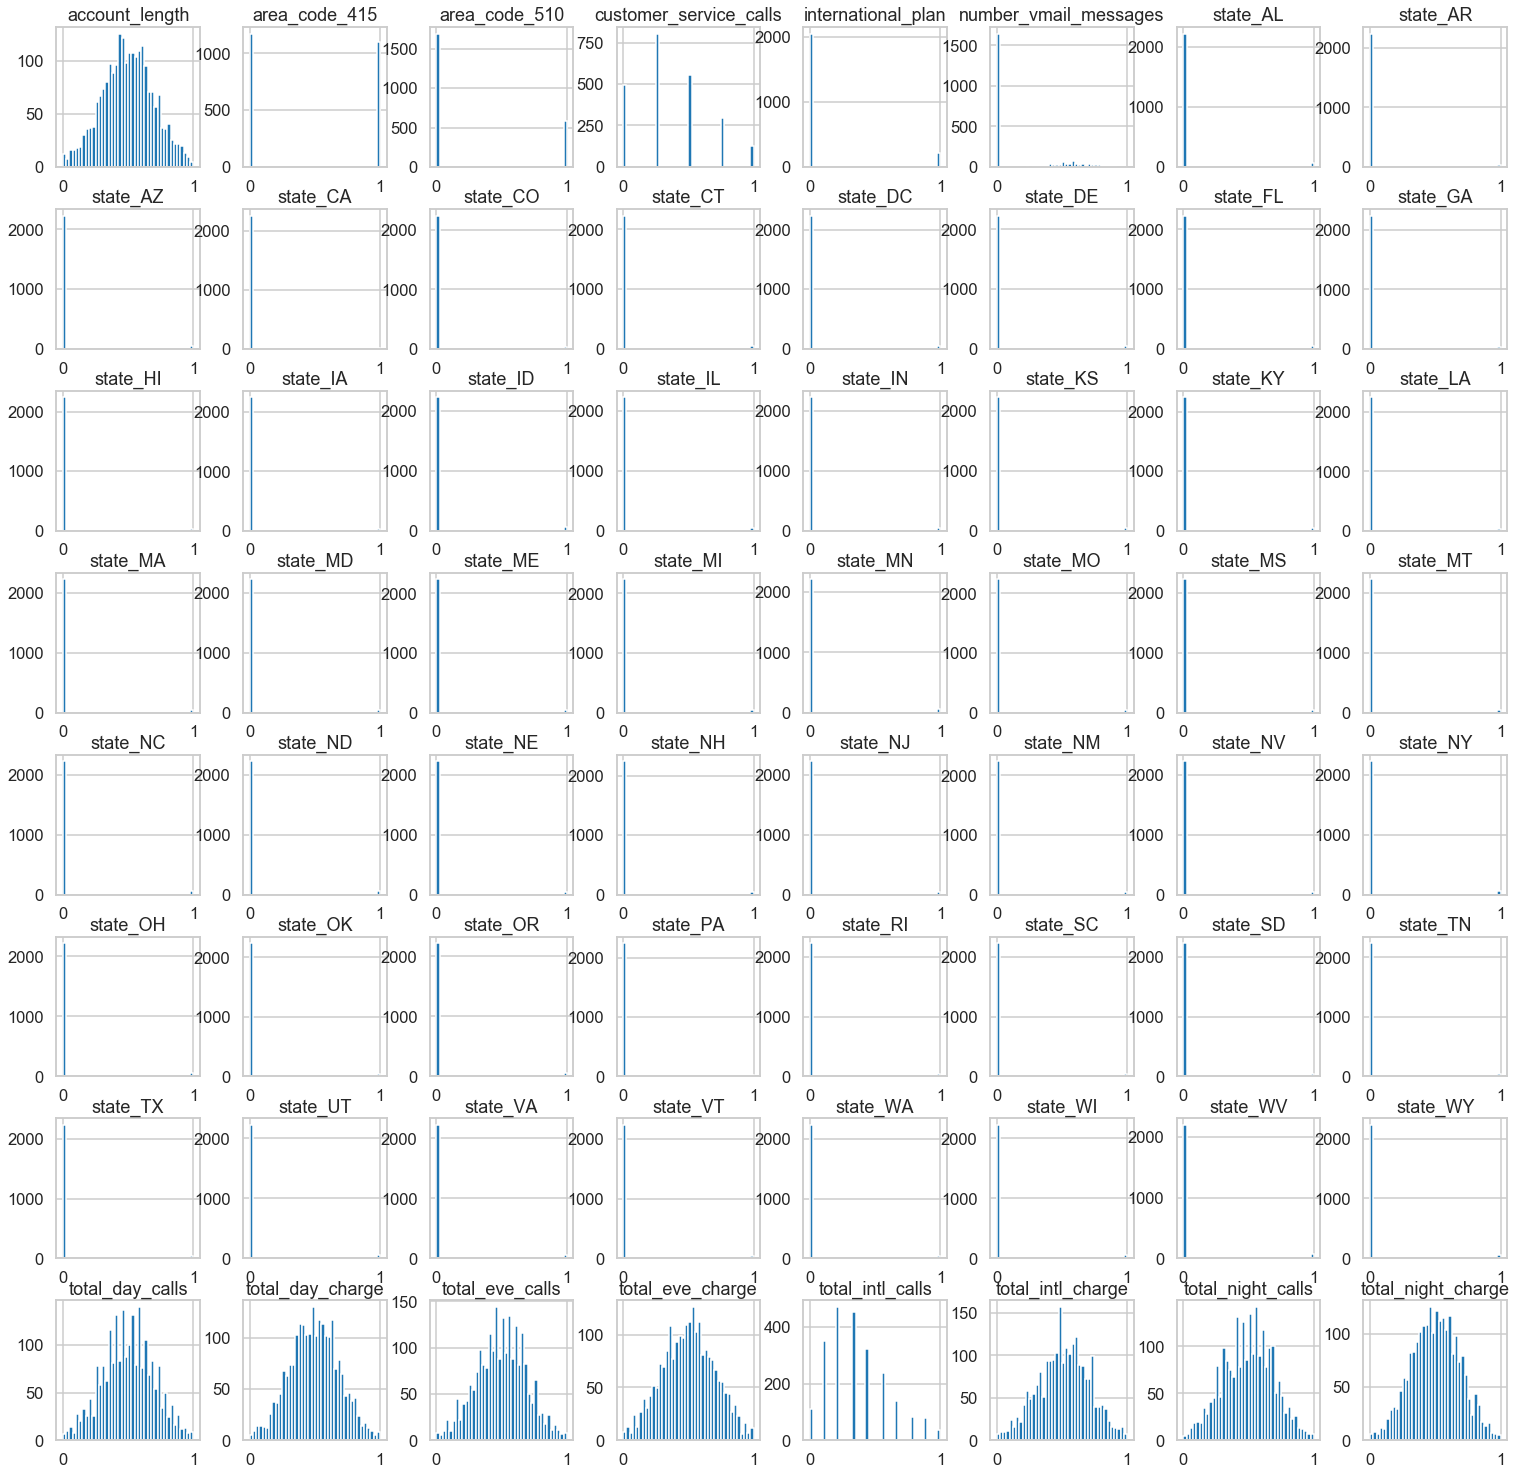

In [153]:
# take a quick look at our normalized feature variables:
x2_train.hist(bins= 40, figsize  = [26, 26])
plt.show();

In [154]:
#create a copy of data1 to do MINMAX scaler:
data3 = data1.copy(deep=True)

# separating data3 features and target: 
x3 = data3.drop(columns = 'churn')
y3 = data3.churn
x3.head()

# split the data3
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = .20)

# StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x3_train = scaler.fit_transform(x3_train)
x3_test = scaler.transform(x3_test)

# x2_train.columns are equal to x2.columns
x3_train = pd.DataFrame(x3_train, columns = x3.columns)
x3_train.head()
#y3_train.head()

# append train and test data3 to the list:
x_train_list.append(x3_train)
y_train_list.append(y3_train)
x_test_list.append(x3_test)
y_test_list.append(y3_test)

x_train_list[3].head()

,account_length,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510
0,0.638191,0.0,0.000000,0.484848,0.554316,0.70,0.787437,0.26,0.371283,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.422111,0.0,0.896876,0.444444,0.597480,0.38,0.641206,0.42,0.587086,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.301508,0.0,0.944491,0.272727,0.236266,0.50,0.415075,0.65,0.406117,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.432161,0.0,0.000000,0.414141,0.458075,0.50,0.603518,0.49,0.389125,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.201005,0.0,0.873382,0.585859,0.540686,0.36,0.468342,0.43,0.311810,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**UPDATE2:**

final cleaned dataframe to start modeling with is **data**

**data** = original dataframe after dropping:

1. unnecessary data: 'phone_numbers'

2. multicollinearity: 'voice_mail_plan','total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'

3. binarizing "state" and "area_code" to 0/1 categories,

4. removing outliers.

**data1** = a copy of the original dataframe **data** in which:

5. 'number_vmail_messages' Log transfered.

**data2** = a copy of the original dataframe **data** in which:

5. features are scaled .

**data3** = a copy of the original dataframe **data** in which:

5. 'number_vmail_messages' Log transfered.
6. features are scaled .

```
x_train_list = [x_train, x1_train, x2_train, x3_train]

y_train_list = [y_train, y1_train, y2_train, y3_train]

x_test_list = [x_test, x1_test, x2_test, x3_test]

y_test_list = [y_test, y1_test, y2_test, y3_test]
```

### 7. Check for class imbalancement
let's take a quick look at a countplot of our target class to determine if rebalancing the data set in the modeling portion is needed:

0    2487
1     357
Name: churn, dtype: int64


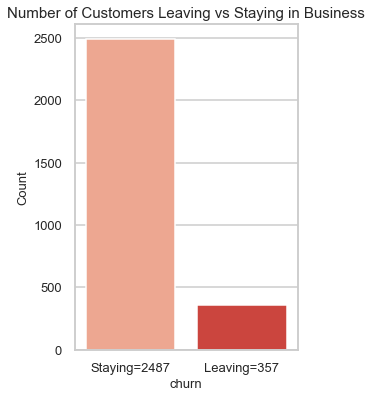

In [155]:
# for the original data before splitting
x = data.drop(columns = 'churn')
y = data.churn
print(y.value_counts())

plt.figure(figsize=(4,6))
sns.countplot(y, palette='Reds')

plt.xticks(size = 13)
plt.yticks(size = 13)

plt.title('Number of Customers Leaving vs Staying in Business', size = 15)

positions = (0,1)
labels = ("Staying=2487","Leaving=357")
plt.xticks(positions, labels)

plt.xlabel('churn', size = 13)
plt.ylabel('Count', size = 13);

0    1977
1     298
Name: churn, dtype: int64


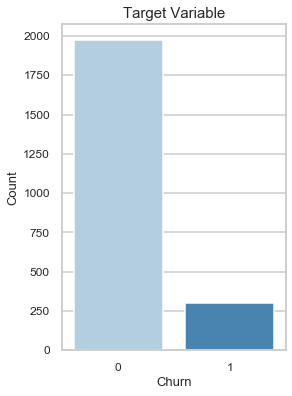

In [156]:
#for training data
print(y_train.value_counts())

plt.figure(figsize=(4,6))
sns.countplot(y_train, palette='Blues')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Target Variable', size = 15)
plt.xlabel('Churn', size = 13)
plt.ylabel('Count', size = 13);

Based on the 0 and 1 ratio of our target, we'll need to conduct some rebalancing on the data set. 

**Rebalancing**
we'll rebalance the data set using the SMOTE method:

**Synthetic Minority Oversampling Technique**
A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.


1. Synthetic Minority Oversampling Technique
2. Imbalanced-Learn Library
3. SMOTE for Balancing Data
4. SMOTE for Classification
5. SMOTE With Selective Synthetic Sample Generation
6. Borderline-SMOTE
7. Borderline-SMOTE SVM
8. Adaptive Synthetic Sampling (ADASYN)

In [157]:
# a for loop to apply SMOTE on each dataset in the list of train and tests: 
#for training data:
#import imblearn
from imblearn.over_sampling import SMOTE, ADASYN

x_trainb_list= list()
y_trainb_list= list()

for i in range(4):
    x_train_balanced, y_train_balanced = SMOTE().fit_sample(x_train_list[i], y_train_list[i])
    print("dataset: ",i)
    print(y_train_list[i].value_counts())
    print("balanced")
    print(pd.Series(y_train_balanced).value_counts(), "\n") 
    
    #new balanced features and target data
    x_trainb = pd.DataFrame(x_train_balanced, columns = x_train_list[i].columns)
    y_trainb = y_train_balanced
    
    # add the balanced training data for all 4 datasets into the list
    x_trainb_list.append(x_trainb)
    y_trainb_list.append(y_trainb)  

dataset:  0
0    1977
1     298
Name: churn, dtype: int64
balanced
1    1977
0    1977
Name: churn, dtype: int64 

dataset:  1
0    1985
1     290
Name: churn, dtype: int64
balanced
1    1985
0    1985
Name: churn, dtype: int64 

dataset:  2
0    1990
1     285
Name: churn, dtype: int64
balanced
1    1990
0    1990
Name: churn, dtype: int64 

dataset:  3
0    1988
1     287
Name: churn, dtype: int64
balanced
1    1988
0    1988
Name: churn, dtype: int64 



In [158]:
print(x_train_list[0].shape)
print(y_train_list[0].shape)
print(x_trainb_list[0].shape)
print(y_trainb_list[0].shape)

(2275, 64)
(2275,)
(3954, 64)
(3954,)


### from know on we are working with:

the original data balanced:**x_trainb_list[0], y_trainb_list[0]**

the original data log-transfered and balanced: **x_trainb_list[1], y_trainb_list[1]**

the original data standardscaled and balanced: **x_trainb_list[2], y_trainb_list[2]**

the original data log-transfered, standardscaled and balanced: **x_trainb_list[3], y_trainb_list[3]**

# Logistic regression model:
1. building model
2. evaluating model 
3. confusion matrix
4. Roc curve
5. parameters tuning(using GridsearchCV)
6. feature selection
7. visualizing the relationship between features and probabilities
8. choosing the final model

# 1) basic logistic regression model 

**random_state**= random number generator to use when shuffling the data, default=None.

**solver**= Algorithm to use in the optimization problem, default=’lbfgs’.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

**penalty**= {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’

Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.

**class_weight**= dict or ‘balanced’, default=None

Weights associated with classes in the form. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

**C**= float, default=1.0

Inverse of regularization strength; must be a positive float. smaller values specify stronger regularization.

**fit_intercept**= bool, default=True

Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

In [159]:
from sklearn.linear_model import LogisticRegression

y_pred_list = list()
for i in range(4):
    logreg = LogisticRegression(random_state=10, solver= "liblinear")
    model = logreg.fit(x_trainb_list[i], y_trainb_list[i])
    y_pred=logreg.predict(x_test_list[i])
    y_pred_list.append(y_pred)
    score=logreg.score(x_test_list[i], y_test_list[i])
    print('logistic regression score, dataset:',i)
    print(score)

logistic regression score, dataset: 0
0.8840070298769771
logistic regression score, dataset: 1
0.8734622144112478
logistic regression score, dataset: 2
0.7486818980667839
logistic regression score, dataset: 3
0.7996485061511424


when you run the predict method for the classification model, it first predicts the probabilities for each class **(y_pred_prob)** and then choose the class with the highest probability as the predicted response **(y_pred)**.

## 2)Evaluating Predictions and Confusion Matrix

### 2a) Classification Report

In [160]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

def report(y_test,y_pred):
    print("Classification report dataset: ", i)
    print("Accuracy_score:",accuracy_score(y_test,y_pred),"\n")
    print(classification_report(y_test,y_pred), "\n")

In [161]:
for i in range(4):
    report(y_test_list[i], y_pred_list[i])

Classification report dataset:  0
Accuracy_score: 0.8840070298769771 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       510
           1       0.43      0.36      0.39        59

    accuracy                           0.88       569
   macro avg       0.68      0.65      0.66       569
weighted avg       0.88      0.88      0.88       569
 

Classification report dataset:  1
Accuracy_score: 0.8734622144112478 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       502
           1       0.44      0.30      0.36        67

    accuracy                           0.87       569
   macro avg       0.68      0.62      0.64       569
weighted avg       0.86      0.87      0.86       569
 

Classification report dataset:  2
Accuracy_score: 0.7486818980667839 

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       497
           1       0

### 2b) Confusion Matrix

1. TP = cm[0][0]
2. FP = cm[0][1]
3. FN = cm[1][0]
4. TN = cm[1][1]

### 2c) Visualizing confusion matrix
using heatmap

In [162]:
def confusion_matrix_report(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
    cm_norm = cm_norm.round(4)
    print("Confusion Matrix dataset: ", i)
    print(cm, "\n")
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_norm, annot=True, cmap= 'Blues', linewidths=10, center=True )
    plt.yticks(np.arange(2)+0.5,('0=cancellation','1=continuation'), rotation=0, fontsize="15", va="center")
    plt.xticks(np.arange(2)+0.5,('0=cancellation','1=continuation'), rotation=0, fontsize="15", va="center")
    
    plt.title('Confusion Matrix Rate', size= 15)
    plt.xlabel('Predicted label', size = 13)
    plt.ylabel('True label', size = 13);
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()    

Confusion Matrix dataset:  0
[[482  28]
 [ 38  21]] 



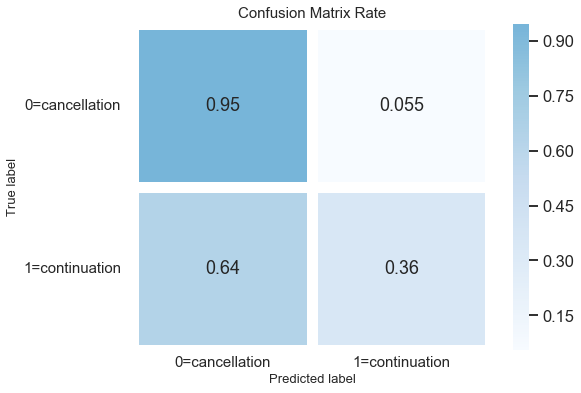

Confusion Matrix dataset:  1
[[477  25]
 [ 47  20]] 



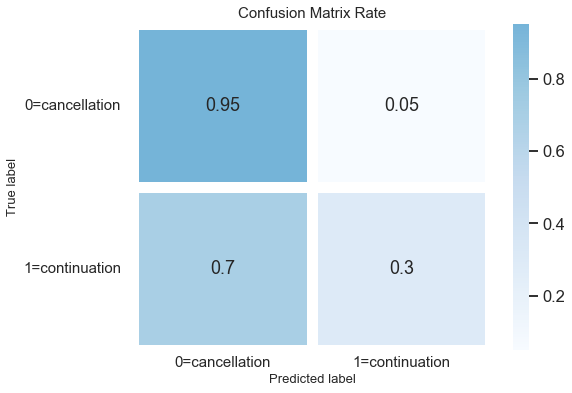

Confusion Matrix dataset:  2
[[379 118]
 [ 25  47]] 



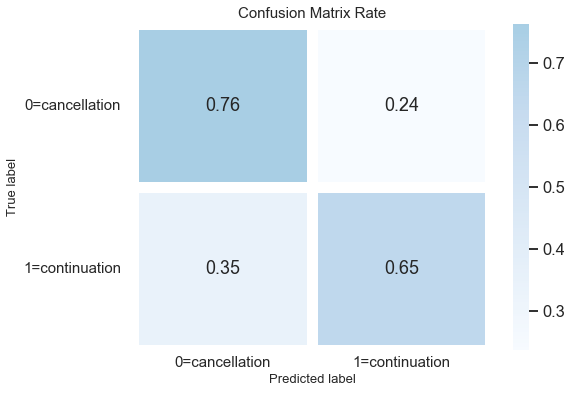

Confusion Matrix dataset:  3
[[404  95]
 [ 19  51]] 



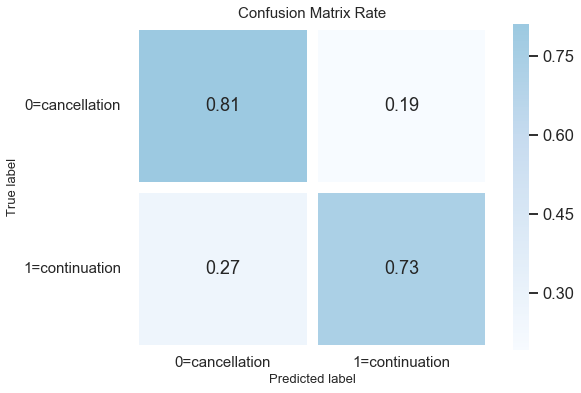

In [163]:
for i in range(4):
    confusion_matrix_report(y_test_list[i], y_pred_list[i])

## 3)ROC Curve

besides the model classification report to compare the differences between accurecy scores and other details, to better compare the performance of our model using differently preprocessed dataset, we are going to visualize the ROC curve and AUC for our initial model for all the train and test sets to decide which dataset should pick to work with:

In [164]:
def ROC_report(x_test, y_test, i):
    y_pred_prob = logreg.decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_label = 'Initial Model data AUC ' + str(i) + ' : '
    print(auc_label, auc(fpr, tpr))
    legend_label = 'Initial Model ROC curve dataset: ' + str(i)
    cmap = mpl.cm.jet
    plt.plot(fpr, tpr, color = cmap(float(i) / float(4.0)), lw = 2, label =legend_label)

Initial Model data AUC 0 :  0.6987371219674312
Initial Model data AUC 1 :  0.6895998097163585
Initial Model data AUC 2 :  0.8063659736194948
Initial Model data AUC 3 :  0.8168050386487261


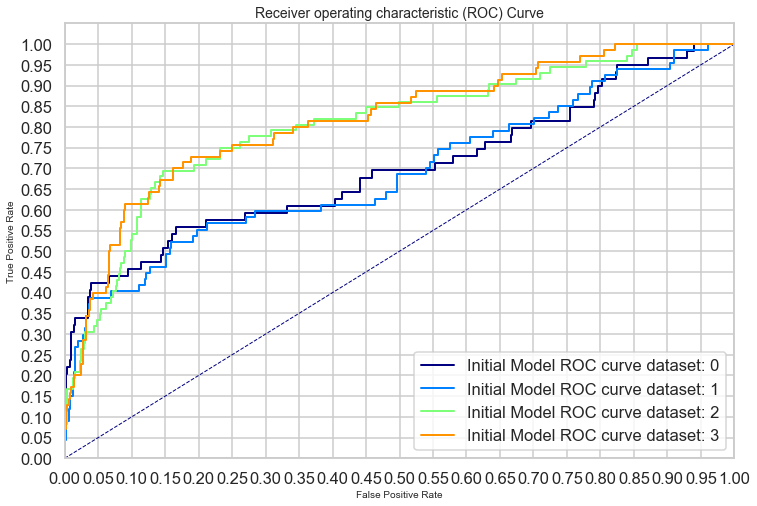

In [165]:
import matplotlib as mpl

plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate', size = 10)
plt.ylabel('True Positive Rate', size = 10)
plt.title('Receiver operating characteristic (ROC) Curve', size = 14)

for i in range(4):
    cm = ROC_report(x_test_list[i], y_test_list[i], i)

plt.legend(loc="lower right");

#### Based on our ROC curve the best preprocessing for the logistic regression has been done on dataset 2, we are going to continue working on our model with the data 2.

## 4) Hyperparameter Tuning

We'll run our grid search using GridsearchCV package available with sklearn to identify some suggested hyperparamaters for the remaining model iterations:

**"C"** parameter is the Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [166]:
from sklearn.model_selection import GridSearchCV

grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100], "penalty":['l1', 'l2', 'none'],
        'class_weight': ['balanced', None], "solver" : ['liblinear', 'saga'], 
        "random_state":[10,15, None]}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=3)
logreg_cv.fit(x_trainb_list[2], y_trainb_list[2])

print("Tuned Hyperparameters: ",logreg_cv.best_params_)
print("Accuracy: ",logreg_cv.best_score_)

C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-p

C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which m

C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages

C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages

C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_

C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which m

C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which m

C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which m

Tuned Hyperparameters:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 10, 'solver': 'saga'}
Accuracy:  0.7979884087424315


C:\Users\farnaz\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Now that we found the best pre-processed data(dataset2) and our tuned hyperparameters for the LogisticRegression, we are going to use this data and hyperparameters to find the most important features for the model, run the model, check its confusion-matrix and ROC curve to find the optimum situation:

1. Tuned Hyperparameters:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'random_state': 10, 'solver': 'liblinear'}
  
  Accuracy:  0.8016995247694506
   

2. Tuned Hyperparameters:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 10, 'solver': 'saga'}

      Accuracy:  0.7939672342571407

## 5) feature selection :

#### 5a) Recursive Feature Elimination with Cross-Validation for n-of-features to include in model:

This method is an extention of Recursive Feature Elimination showed above as our scoring metric to identify the suggested number of features to include in our final model. 

In this method we have to set the number of k-fold cross validation, basically takes the subset of the traing set and measure the performance, Say you run a 3-fold RFECV. For each split, the train set will be transformed by RFE n times (for each possible 1..n number of features). The classifier supplied will be trained on the training set, and a score will be computed on the test set. Eventually, for each 1..n number of features, the mean result from the 3 different splits is shown on the graph you included. Then, RFEVC transforms the entire set using the best scoring number of features. The ranking you see is based on that final transformation.


Optimal number of features: 54


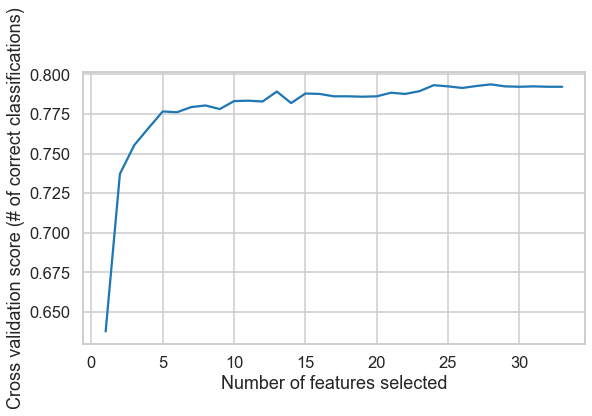

In [167]:
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import KFold

rfecv = RFECV(estimator=logreg, step=2, cv=StratifiedKFold(5), scoring="accuracy")
#rfecv = RFECV(estimator=logreg, step=1, cv=KFold(10), scoring="accuracy")

rfecv.fit(x_trainb_list[2], y_trainb_list[2])

print("Optimal number of features: {}".format(rfecv.n_features_))

# Plotting the best number of features with respect to the Cross Validation Score:
plt.figure(figsize=(9,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### NOTE:
as we can see the optimal number of features from around 15 to 28 has only a little improvement, thus our preference is to keep it around 10 to 15 features for the first trial.

### 5b)Recursive Feature Elimination for finding top features:
We will use RFE with the Logistic Regression classifier to select the top features. The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [169]:
# Feature extraction on balanced data1
from sklearn.feature_selection import RFECV, RFE

model = LogisticRegression(solver='liblinear')
selector = RFE(estimator= model, n_features_to_select=15, step=0.8)
fit = selector.fit(x_train_list[2], y_train_list[2])

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 15
Selected Features: [False  True  True False  True False  True False  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False  True False False False False  True False False False False False
 False False False  True False False  True False  True False False False
  True False False False]
Feature Ranking: [2 1 1 2 1 2 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 1 2 2 2]


In [ ]:
# summary of inspecting the RFE result:
#print(dict(zip(x2.columns, fit.ranking_)))

#### Explore the top most significant features based upon their coefficients and correlation with the target:

In [168]:
logreg = LogisticRegression(random_state=10, solver= "liblinear")
model = logreg.fit(x_trainb_list[2], y_trainb_list[2])
coefs = logreg.coef_.T
#pd.set_option("display.max_rows", 100) 
#target_coefs=pd.DataFrame(list(zip(x2, coefs)), columns=['Features', 'Estimated Coefficient'])
#target_coefs.sort_values('Estimated Coefficient', ascending=False).reset_index()

In [ ]:
#print(dict(zip(x2.columns, abs(logreg.coef_[0]))))

#### visualizing feature importances based on their coefficients to identify the most impactful feature:

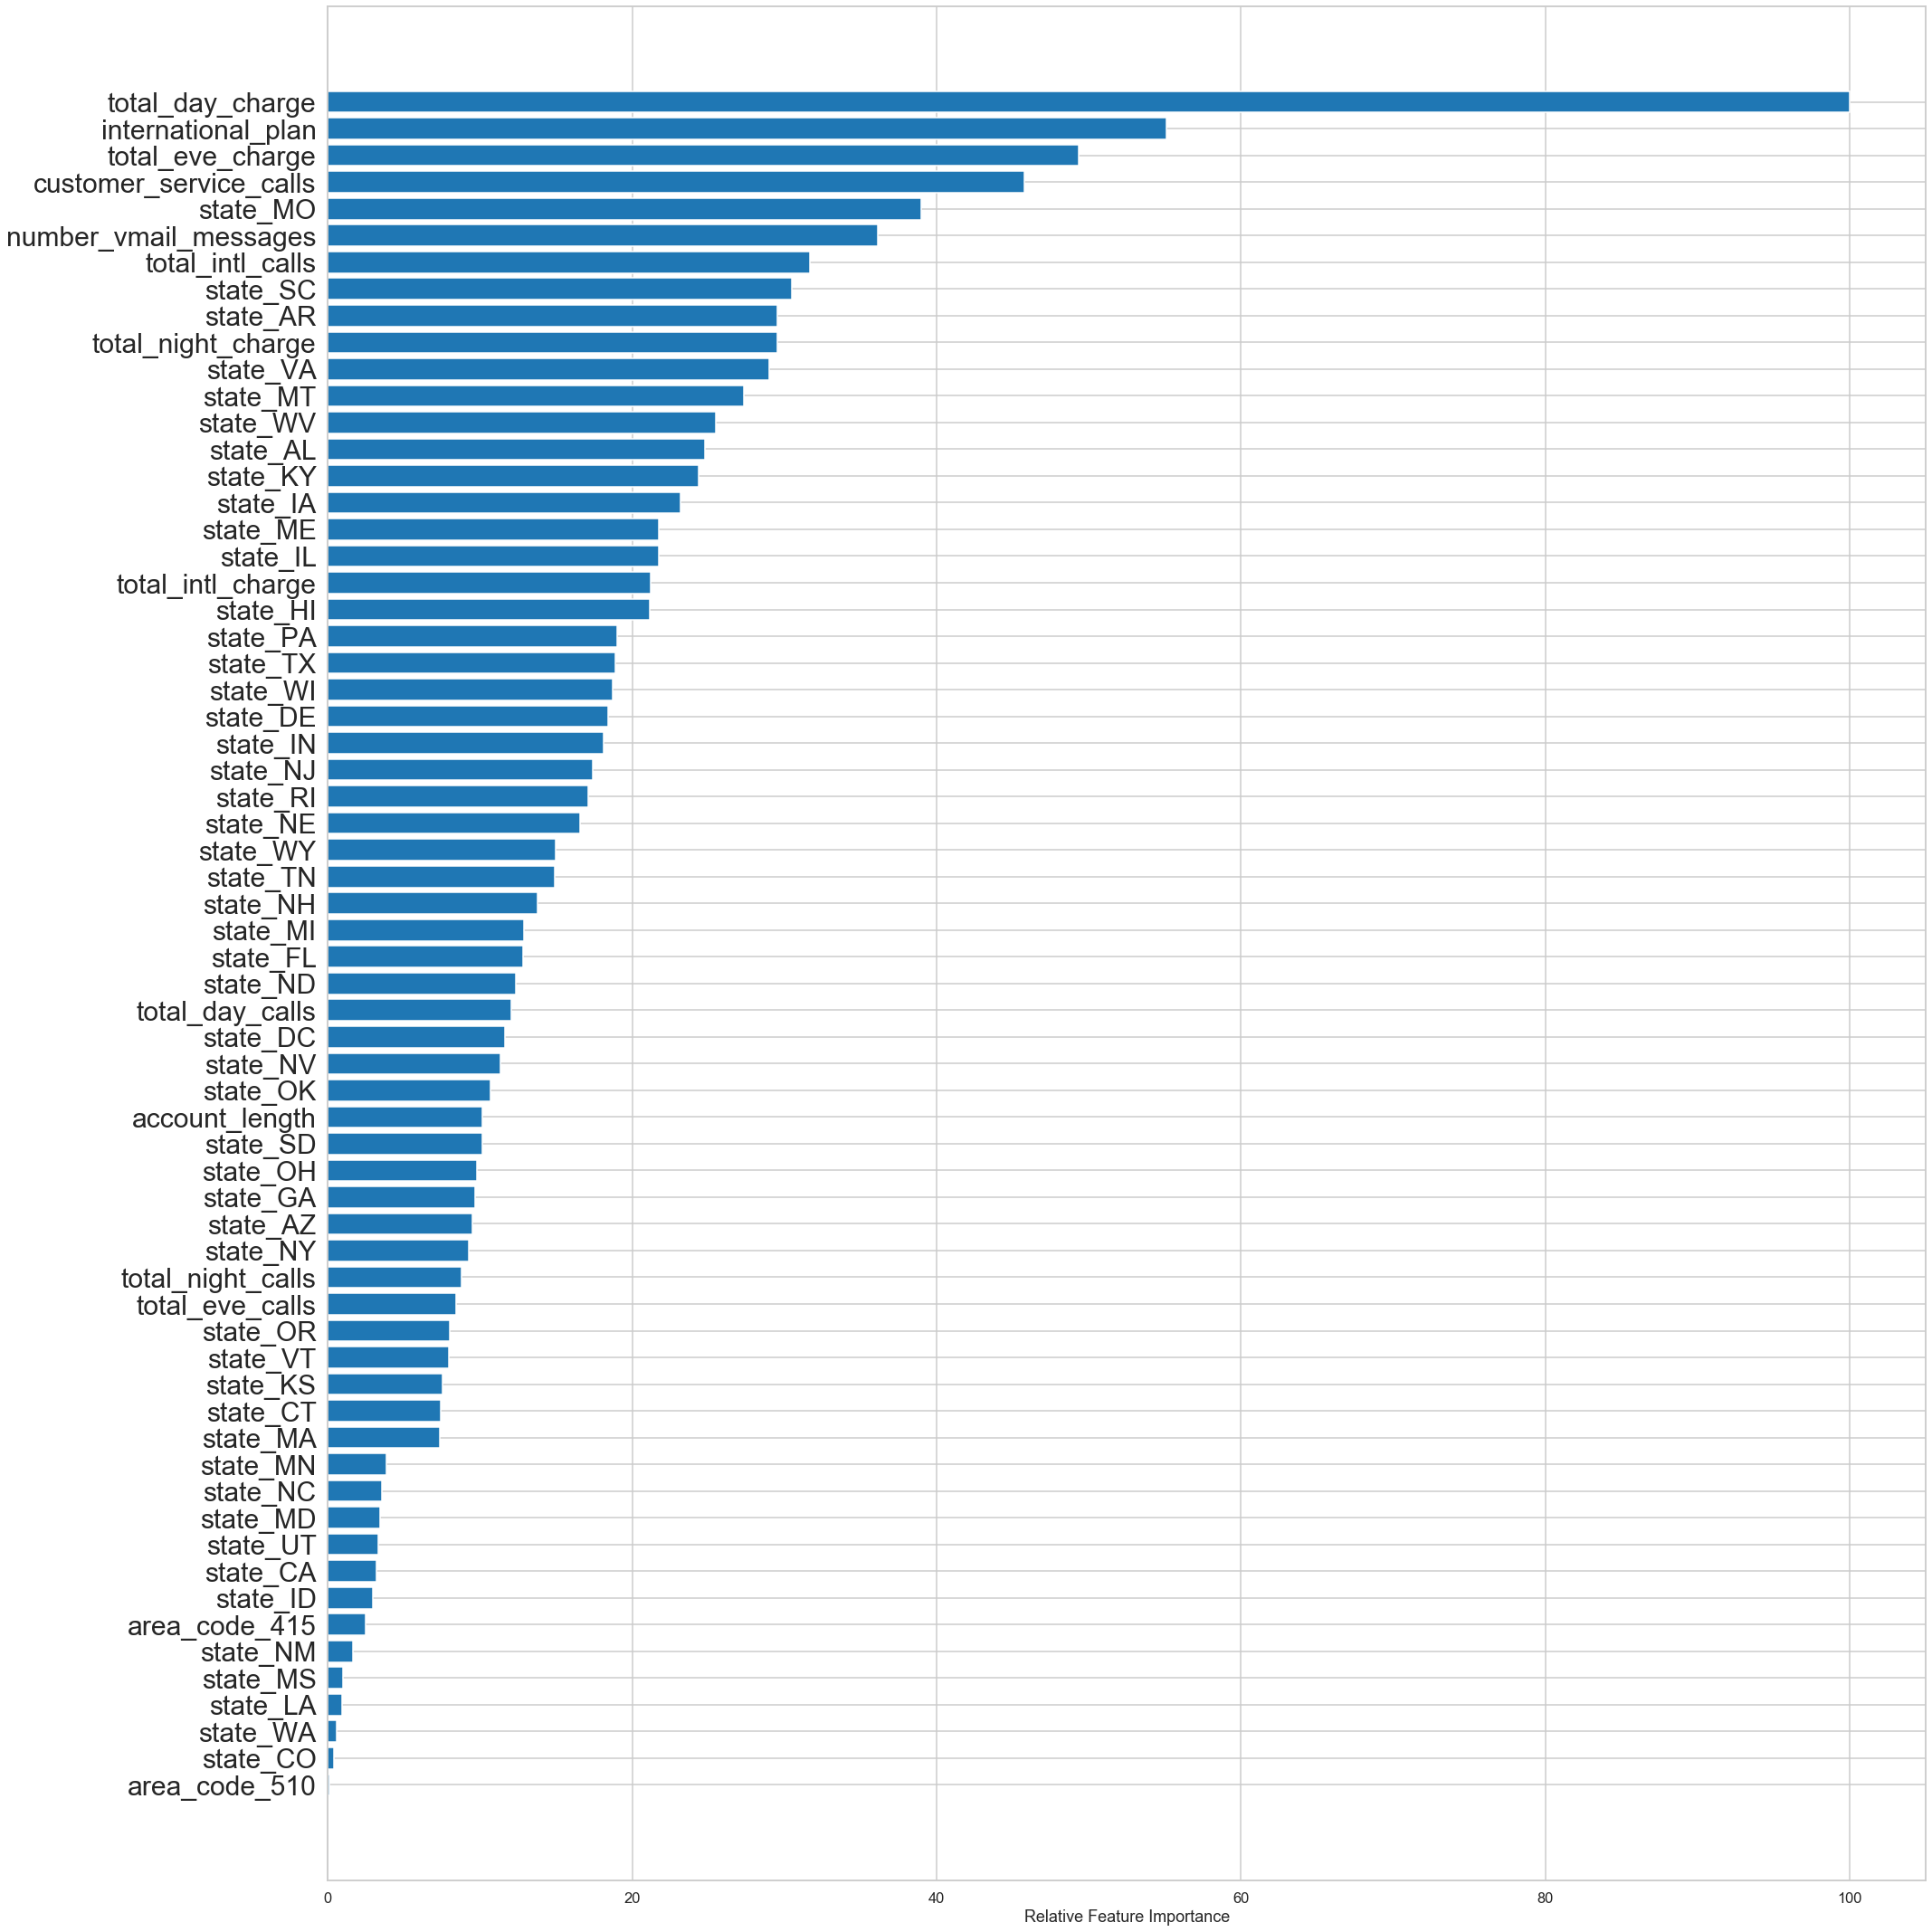

In [170]:
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(30,30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train.columns)[sorted_idx], fontsize=30)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

### According to our different feature selection methods:

1. "international_plan","total_day_charge","total_eve_charge" are the most significant features among all. 
2. location and "state" is also an important feature.
3. "customer_service_calls", "number_vmail_messages", "total_intl_charge" are some other important features to explore.

In [171]:
# exploring some models:
def model(logreg, x_train, y_train):
    
    x_train_balanced, y_train_balanced = SMOTE().fit_sample(x_train, y_train)
    x_train = pd.DataFrame(x_train_balanced, columns = x_train.columns)
    y_train = y_train_balanced
    
    model_log = logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_test)
    y_pred_prob = logreg.decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    print('Model Test Data Precision: {}'.format(precision_score(y_test, y_pred).round(3)))
    print('Model Test Data Accuracy: {}'.format(accuracy_score(y_test, y_pred).round(3)))
    print('model Test Data AUC: {}'.format(auc(fpr, tpr).round(3)))
   
    #TP = 0
    #FP = 0
    #TN = 0
    #FN = 0
    #np_y_test = y_test.to_numpy()
    #for i in range(len(y_pred)):
    #    if np_y_test[i]==1 and y_pred[i]==1:
    #      TP += 1
    #    if np_y_test[i]==1 and y_pred[i]==0:
    #       FN += 1
    #    if np_y_test[i]==0 and y_pred[i]==0:
    #       TN += 1
    #    if np_y_test[i]==0 and y_pred[i]==1:
    #      FP += 1 
    #print("TP =",TP/len(y_test)," FP=",FP/len(y_test)," TN=",TN/len(y_test)," FN=",FN/len(y_test))
    #print("TP+FN= ",(TP+FN))
    #print("FP+TN= ",(FP+TN))
    
    # Confusion matrix Using Heatmap
    cnf_matrix = confusion_matrix(y_test, y_pred) 
    tn_cost = (cnf_matrix[0][0] / len(y_test))
    fp_cost = (cnf_matrix[0][1]/len(y_test)) 
    fn_ben = (cnf_matrix[1][0]/len(y_test)) 
    tp_ben = (cnf_matrix[1][1]/len(y_test)) 
    #print("TN+FP=",tn_cost+fp_cost)
    #print("TP+FN=",tp_ben+fn_ben)
    
    cnf_matrix_norm = cnf_matrix / cnf_matrix.sum(axis=1)[:,np.newaxis]
    plt.figure(figsize=(8,6))
    sns.heatmap(cnf_matrix_norm, annot=True, cmap= 'Blues', linewidths=10, center=True )
    plt.yticks(np.arange(2)+0.5,('0=cancellation','1=continuation'), rotation=0, fontsize="15", va="center")
    plt.xticks(np.arange(2)+0.5,('0=cancellation','1=continuation'), rotation=0, fontsize="15", va="center")
    plt.title('Confusion Matrix', size= 15)
    plt.xlabel('Predicted label', size = 13)
    plt.ylabel('True label', size = 13);
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()      
    print()  
    
    #ROC Curve
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, color = 'blue', lw = 2, label ='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', size = 12)
    plt.ylabel('True Positive Rate', size = 12)
    plt.title('Receiver operating characteristic (ROC) Curve', size = 14)
    plt.legend(loc="lower right");

### 5c) Exploring a few models considering different features and hyperparameters:

1. important features:
```
1."international_plan"
2."total_day_charge"
3."total_eve_charge" 
4."state" 
5."customer_service_calls"
6."number_vmail_messages" 
7."total_intl_charge"
```

3. Tuned Hyperparameters:

```javascript
{
    'C': 10, 
    'class_weight': 'balanced',  
    'penalty': 'l1', 
    'random_state': 10, 
    'solver': 'liblinear'
} 
```

### Logistic regression model #1:

Model Test Data Precision: 0.227
Model Test Data Accuracy: 0.687
model Test Data AUC: 0.711


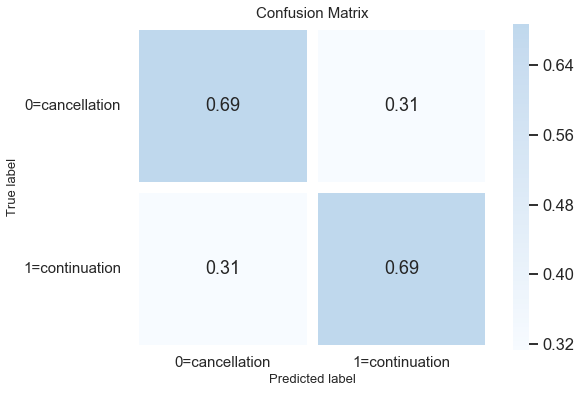

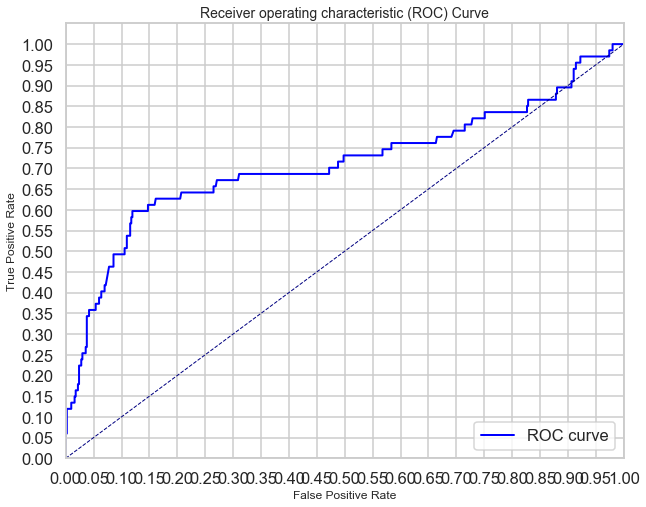

In [172]:
x = data2[['total_day_charge','international_plan']]
y = data2.churn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20)
#logreg=LogisticRegression(penalty='l1',class_weight="balanced",C=100,solver='liblinear',random_state=15)
logreg=LogisticRegression(class_weight="balanced",solver='liblinear',C=0.1, penalty='l2')
model(logreg,x_train,y_train)

### Logistic regression model #2:

Model Test Data Precision: 0.262
Model Test Data Accuracy: 0.682
model Test Data AUC: 0.741


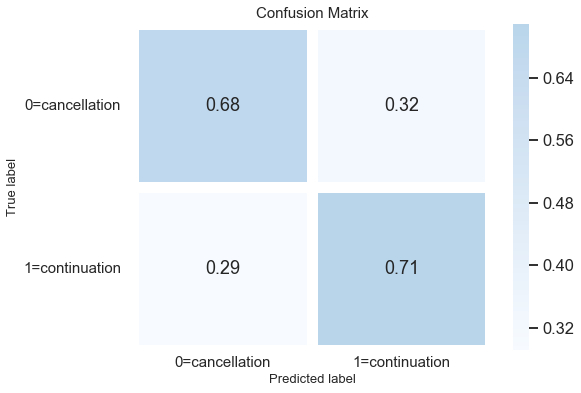

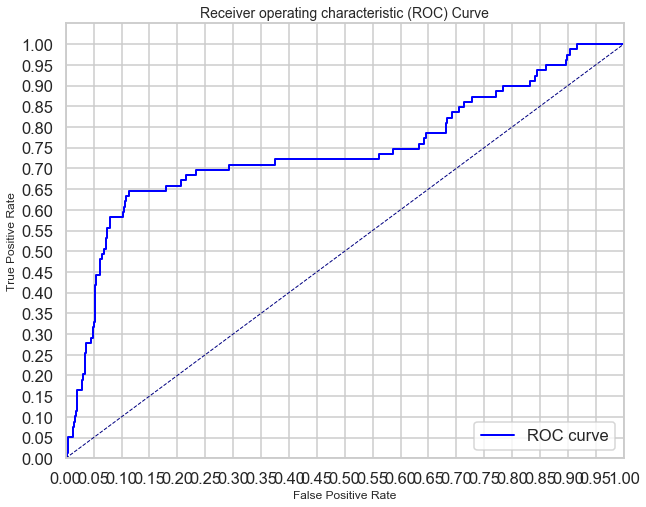

In [173]:
x = data2[['total_day_charge','international_plan','total_eve_charge']]
y = data2.churn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20)
#logreg=LogisticRegression(penalty = 'l1', class_weight = "balanced", C = 100, 
#                          solver= 'liblinear', random_state=10)
logreg=LogisticRegression(class_weight="balanced",solver='liblinear',C=10, penalty='l1')
model(logreg,x_train,y_train)

### Logistic regression model #3:

Model Test Data Precision: 0.258
Model Test Data Accuracy: 0.705
model Test Data AUC: 0.788


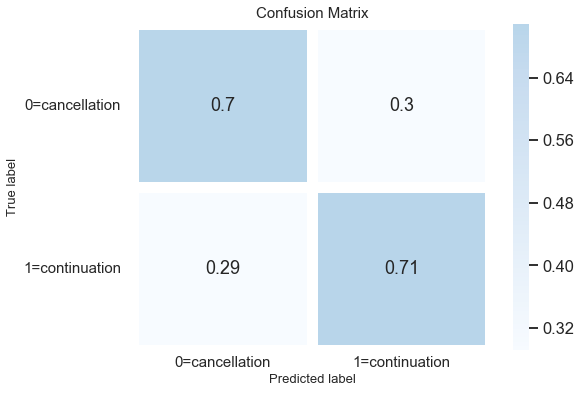

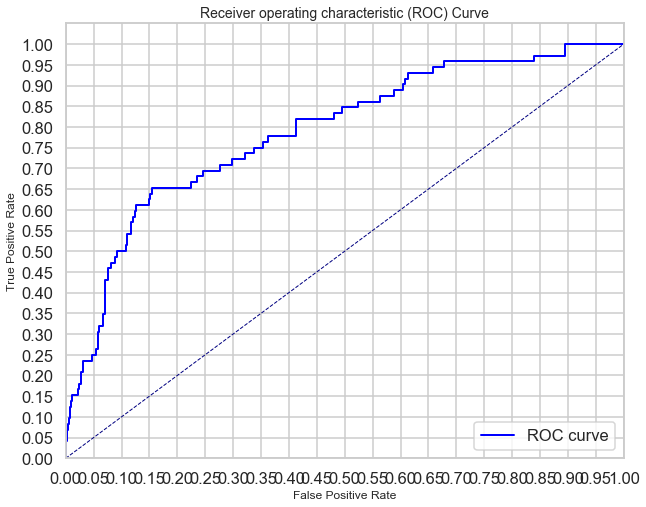

In [174]:
x = data2[['total_day_charge','international_plan','total_eve_charge','customer_service_calls']]
y = data2.churn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20)
#logreg=LogisticRegression(penalty = 'l1', class_weight = "balanced", C = 100, 
#                          solver= 'liblinear', random_state=10)
logreg=LogisticRegression(class_weight="balanced",solver='liblinear',C=1, penalty='l1')
model(logreg,x_train,y_train)

### Logistic regression model #4:

Model Test Data Precision: 0.234
Model Test Data Accuracy: 0.689
model Test Data AUC: 0.767


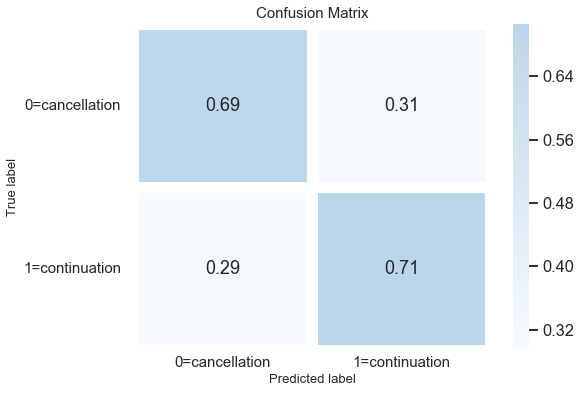

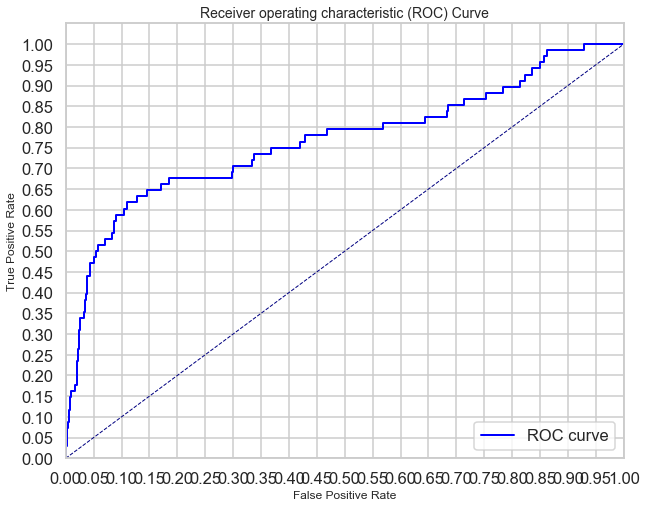

In [175]:
x = data2[['total_day_charge','international_plan','total_eve_charge','customer_service_calls',
           'number_vmail_messages']]
y = data2.churn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20)
logreg=LogisticRegression(penalty='l1',class_weight="balanced",C=1,solver='liblinear',random_state=0)
model(logreg,x_train,y_train)

###  Logistic regression model #5:

Model Test Data Precision: 0.224
Model Test Data Accuracy: 0.677
model Test Data AUC: 0.793


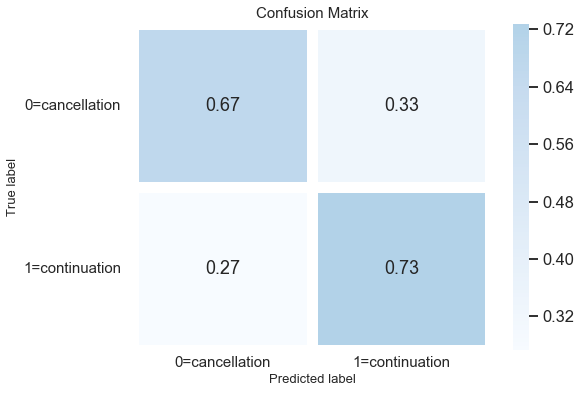

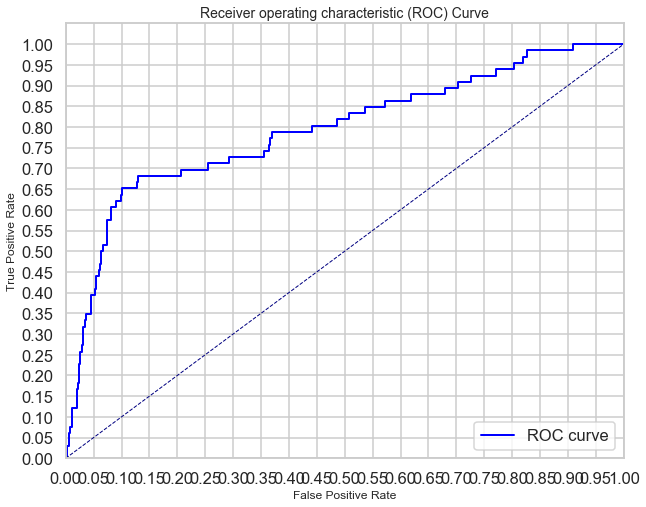

In [176]:
x = data2[['total_day_charge','international_plan','total_eve_charge','customer_service_calls',
           'number_vmail_messages']]
y = data2.churn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20)
logreg=LogisticRegression(penalty='l1',class_weight="balanced",C=0.1,solver='liblinear',random_state=0)
model(logreg,x_train,y_train)

### 6) visualizing scatter plots of each feature with the probabilities.
Comparing it to the true results:

C:\Users\farnaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\farnaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


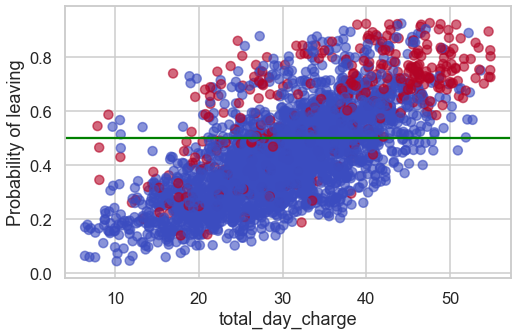

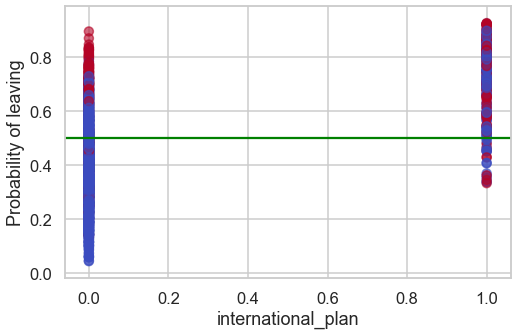

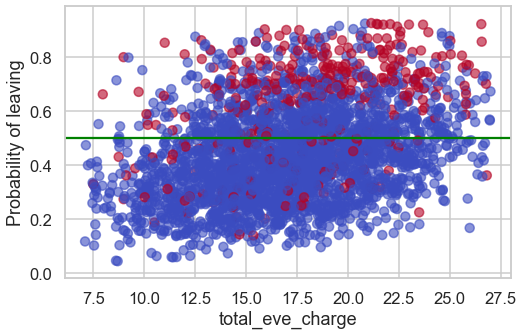

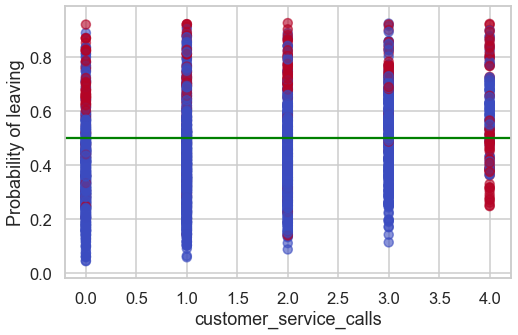

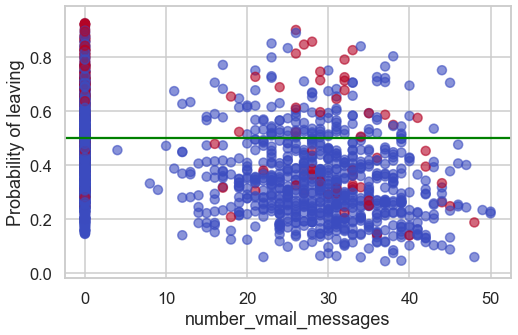

In [177]:
# we create a dataframe with our most important features.
x = data2[['total_day_charge','international_plan','total_eve_charge','customer_service_calls',
          'number_vmail_messages']]

# we add a column to the x dataframe called prob which is the probability of leaving and will 
# be calculated through the logreg.predict_proba for all the columns of x dataframe.
x['y_prob']= logreg.predict_proba(x)[:, 1]

# 1.we add a column to the x dataframe called target which is the true churn column
# 2.we pass the true churn value to the c,so it shows highlight color for 1 (leaving) and darker 
#   color for 0(staying).
x['target']= y.values

for col in x.drop(['y_prob', 'target'], axis=1).columns:
    plt.figure(figsize=(8,5))
    plt.scatter(col, 'y_prob', data=x, c='target', cmap= 'coolwarm', alpha=.6)
    plt.xlabel(col)
    plt.ylabel('Probability of leaving')
    plt.axhline(y=0.5, color='g', linestyle='-')
    plt.show()

### 6a) Checking scatter plots of each state with every important features, 
comparing them with the true results as well:

C:\Users\farnaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\farnaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


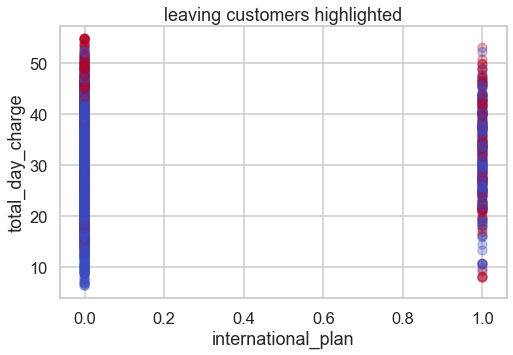

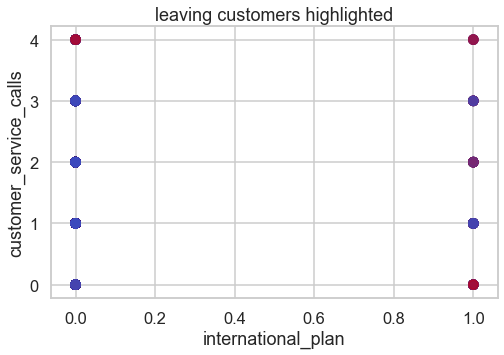

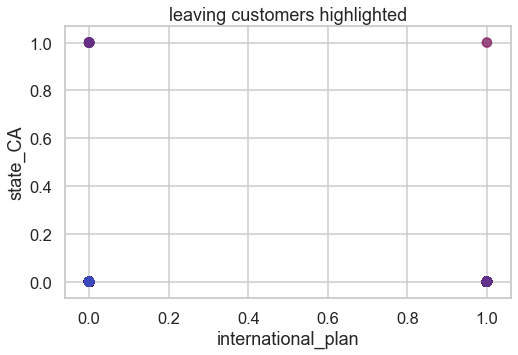

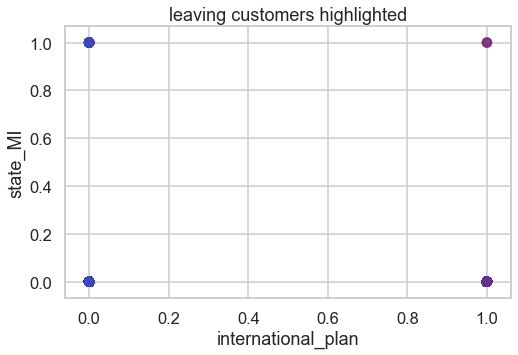

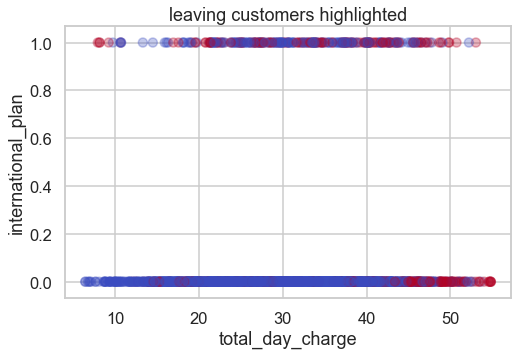

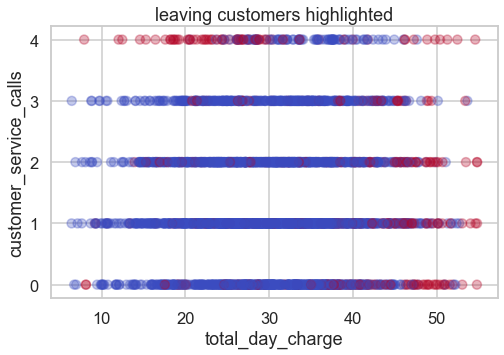

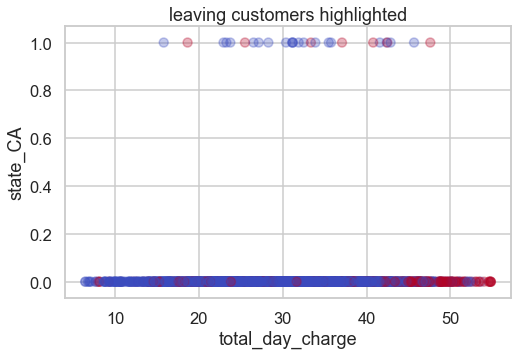

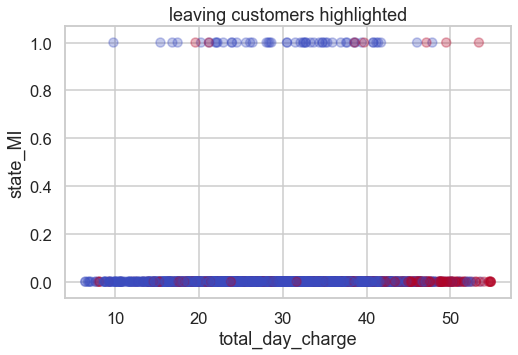

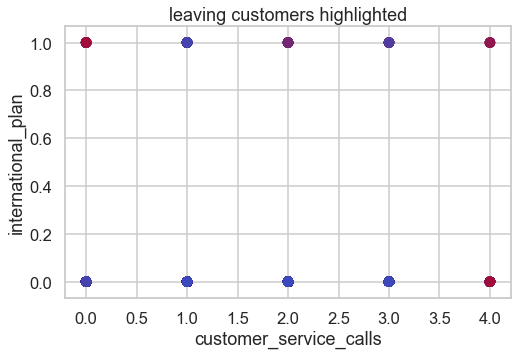

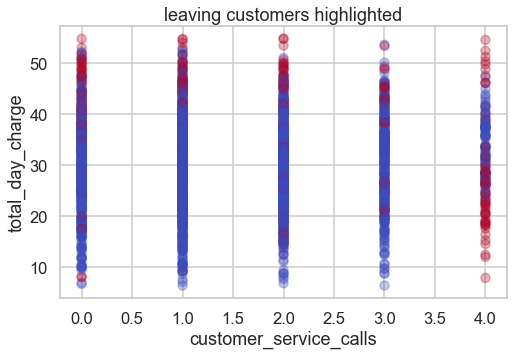

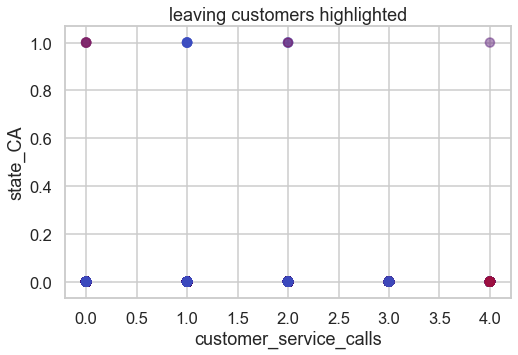

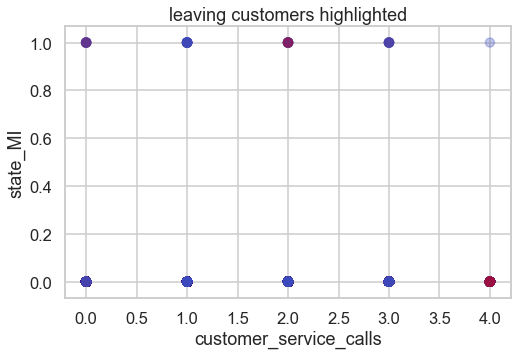

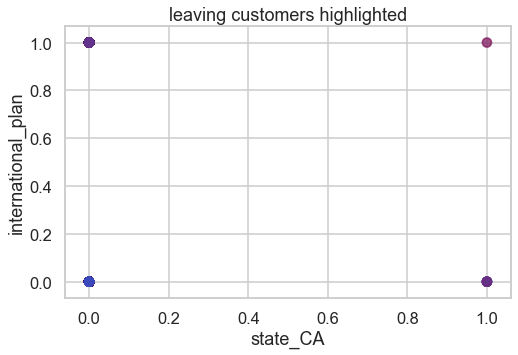

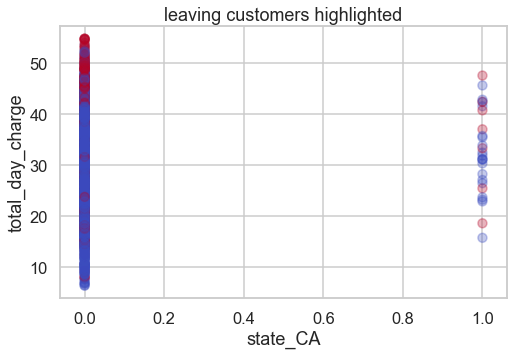

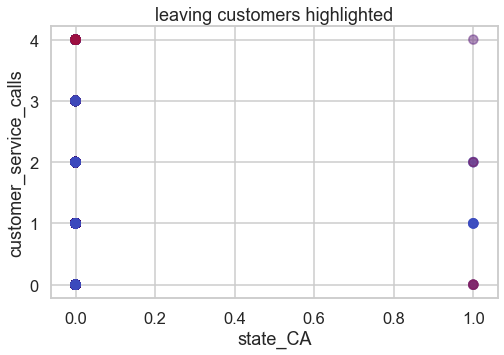

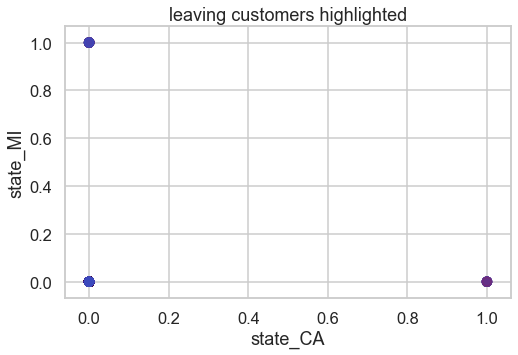

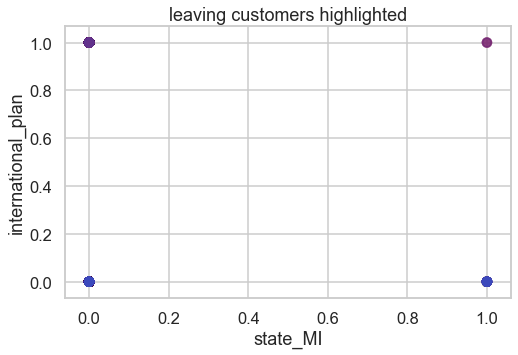

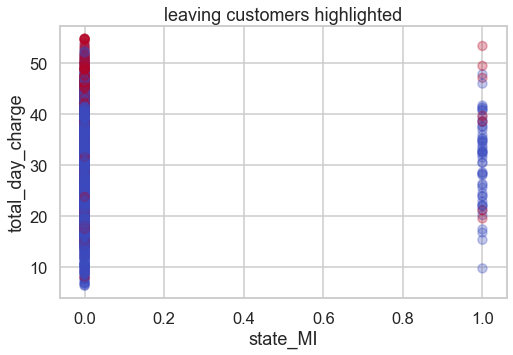

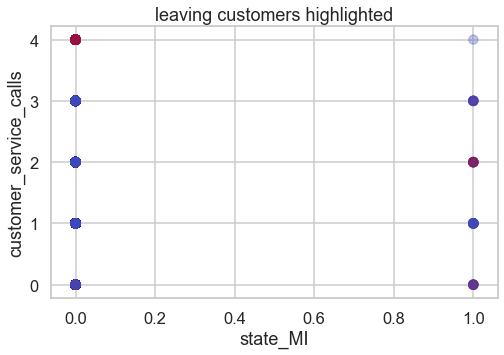

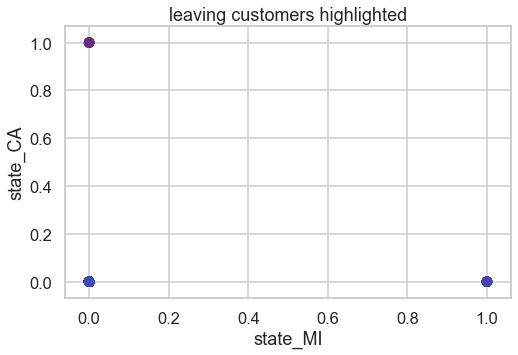

In [178]:
# we create a dataframe with our most important features.
x = data2.iloc[:,[1,4,11,16,34]]

# we add a column to the x dataframe called prob which is the probability of leaving and will 
# be calculated through the logreg.predict_proba for all the columns of x dataframe.
x['y_prob']= logreg.predict_proba(x)[:, 1]

# 1.we add a column to the x dataframe called target which is the true churn column
# 2.we pass the true churn value to the c,so it shows highlight color for 1 (leaving) and darker 
#   color for 0.
x['target']= y.values

for col in x.drop(['y_prob', 'target'], axis=1).columns:
    for col1 in x.drop(['y_prob', 'target'], axis=1).columns:
        if col == col1:
            continue
        plt.figure(figsize=(8,5))
        plt.scatter(col, col1, data=x, c='target', cmap='coolwarm', alpha=.3)
        plt.xlabel(col)
        plt.ylabel(col1)
        plt.title('leaving customers highlighted')
        plt.show()

## 7) evaluating the model:

#### the financial impact of the model prediction on the SyriaTel, telecommunications company:

1. **True Negative(specificity): cost**

>SyriaTel, a telecommunications company will lose its customer through canceling the service and discontinuing the subscription.

2. **False Positive(type 1 error): cost**

>our model predicts that SyriaTel costumer will continue doing business with the company but they dont !In this case, the model will instruct the website not to offer a promo plan or discount, thus lost opportunity to keep making revenue from a potential customer.

3. **False Negative(type 2 error): Benefit**

>SyriaTel company will earn money in revenue if the model predicts a customer will leaving the company, thus a promo plan or discount is offered, and the customer may change their mind and stay

4. **True Positive(sensitivity/recall): Benefit**

>SyriaTel company will earn in revenue if our model correctly predicts a customer continues doing business with them, thus no discount or promo is offered.


# Recommendations:

by default, we assume we dont know the budget of company to distribute promotion and offers and their ability to change any charge rates, so we only suggest our formula based on the raw input:

#### the policy can be offering promo plans to potential leaving customers to motivates them to stay.

Promo_Plan to keep customer motivated = [(potential yearly promo) + (12* potential monthly discount)]

1. TP_model: 
**revenue gain/yearly** = TP * [(monthly_contract*12)]

2. TN_model: 
**revenue loss/yearly** = TN * [(monthly_contract*12)]

even if a promo plan is being offered it is not gonna be used because the customer is not staying, so we dont assume any cost on promo plans.

3. FN_model:
**benefit on revenue & loss on promo plans** = FN * [(monthly_contract*12) - (promo_plan)]

our prediction says the customer is leaving so we offer a promo plan to motivate the customer to stay, but the sustomer will staying and we dont lose the revenue but we lose on the promo plan.

4. FP_model:
**revenue loss/yearly** = FP * [(monthly_contract*12)]

So, to pick the optimal model based on the confusion matrix info, the model should maximize the benefit equation:


## Benefit equation:
+  TP * (monthly_contract*12) - TN * (monthly_contract*12) - FP * (monthly_contract*12) + FN * [(monthly_contract*12) - (promo_plan)] 


#### So our model will best benefit the company if limits the false positive predictions. 
#### Thus, we want a model that reflects high precision which limits the false positive predictions.

### Final model : model #2

+ most important features: ['total_day_calls','international_plan','customer_service_calls']

+ Logistic regression with tuned Hyperparameters:


```javascript
{
    'C': 0.1, 
    'class_weight': 'balanced',  
    'penalty': 'l1', 
    'random_state': 10, 
    'solver': 'liblinear'
} 
```

+ Model Test Data Precision: 0.345

  Model Test Data Accuracy: 0.738
  
  Model Test Data AUC: 0.845

# Future Work:

1. Run other classification algorithms and compare the results to our existing model. Decision Trees, Random Forests, and Support Vector Machines are a few other classifiers to consider testing.

2. Define a function to show the affect of location and each specific state on the leaving probability when all other features are the same.

3. Identifying new promotion plans to higher the benefit and lower the probability of leaving the company.